# kmeans聚类的基本操作

## 创建数据集

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets.samples_generator import make_blobs

In [2]:
X,y=make_blobs(n_samples=1000,n_features=2,centers=[[-1,-1], [0,0], [1,1], [2,2]],cluster_std=[0.4, 0.2, 0.2, 0.2],random_state=666)

In [3]:
X.shape

(1000, 2)

In [4]:
y.shape

(1000,)

In [5]:
import pandas as pd

In [6]:
pd.Series(y).unique()

array([1, 3, 2, 0], dtype=int64)

## 绘制生成的数据

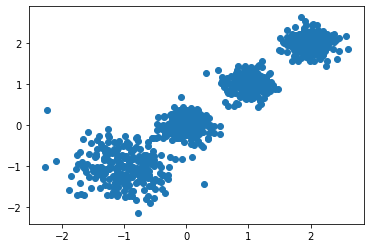

In [7]:
plt.scatter(X[:,0],X[:,1],marker='o')

## kmeans聚类

In [8]:
from sklearn.cluster import KMeans

In [9]:
kmeans=KMeans(n_clusters=4,random_state=666)

In [10]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=666, tol=0.0001, verbose=0)

In [11]:
y_pred=kmeans.predict(X)

## kmeans聚类算法绘图

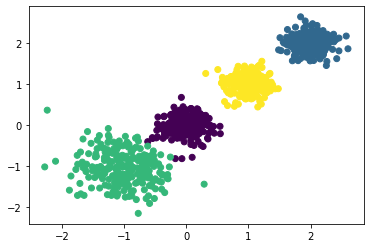

In [12]:
plt.scatter(X[:,0],X[:,1],c=y_pred,marker='o')

In [13]:
kmeans.cluster_centers_

array([[-0.01095344, -0.01368744],
       [ 2.00412517,  1.98634415],
       [-1.01159718, -1.05337063],
       [ 0.99736643,  0.99152465]])

135.2901037612611

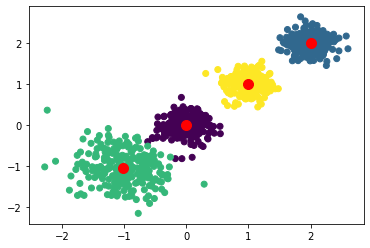

In [14]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4,random_state=666)
y_pred=kmeans.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred,marker='o')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',s=100)
#样本组间距离平方和
kmeans.inertia_

## 绘制学习曲线寻找最优的k值

[645.6350386101146]
[645.6350386101146, 380.68153124590265]
[645.6350386101146, 380.68153124590265, 135.2901037612611]
[645.6350386101146, 380.68153124590265, 135.2901037612611, 107.77597964729958]
[645.6350386101146, 380.68153124590265, 135.2901037612611, 107.77597964729958, 93.083319965286]
[645.6350386101146, 380.68153124590265, 135.2901037612611, 107.77597964729958, 93.083319965286, 85.9031815459494]


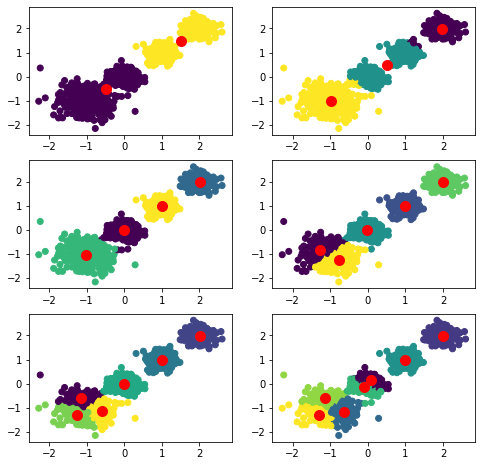

In [15]:
from sklearn.cluster import KMeans
plt.figure(figsize=(8,8))
inertias=[]
for i in range(2,8):
    kmeans=KMeans(n_clusters=i,random_state=666)
    y_pred=kmeans.fit_predict(X)
#绘制子图
    plt.subplot(3,2,i-1)
    plt.scatter(X[:,0],X[:,1],c=y_pred,marker='o')
    plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',s=100)
#样本组间距离平方和
    inertias.append(kmeans.inertia_)
    print(inertias)

## 评估聚类算法的方法

### 组间距离

Text(0, 0.5, 'inertials')

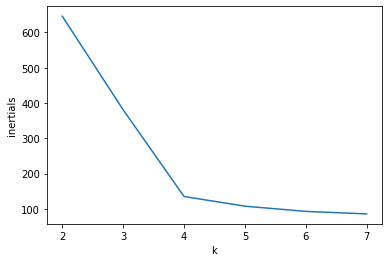

In [16]:
plt.plot(range(2,8),inertias)
plt.xlabel('k')
plt.ylabel('inertials')

### 轮廓系数

In [17]:
# 导入轮廓系数API
from sklearn.metrics import silhouette_score

In [18]:
silhouette_score(X,y_pred)

0.5279944657844706

### 绘制轮廓系数的学习曲线

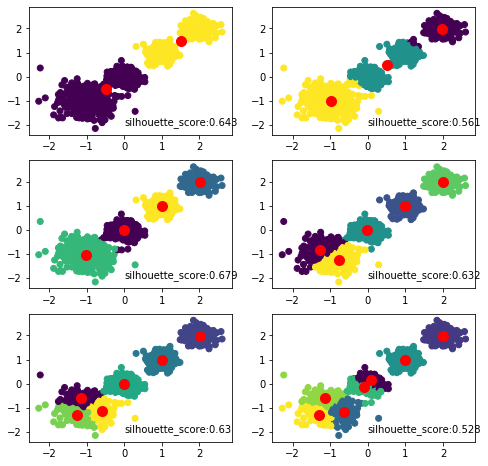

In [19]:
from sklearn.cluster import KMeans
plt.figure(figsize=(8,8))
inertias=[]
sil=[]
for i in range(2,8):
    kmeans=KMeans(n_clusters=i,random_state=666)
    y_pred=kmeans.fit_predict(X)
#绘制子图
    plt.subplot(3,2,i-1)
    plt.scatter(X[:,0],X[:,1],c=y_pred,marker='o')
    plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',s=100)
#样本组间距离平方和
    inertias.append(kmeans.inertia_)
    #轮廓系数
    s=silhouette_score(X,y_pred)
    sil.append(s)
    #图片上加文本
    plt.text(0,-2,'silhouette_score:'+str(round(s,3)))

Text(0, 0.5, 'silhouette_score')

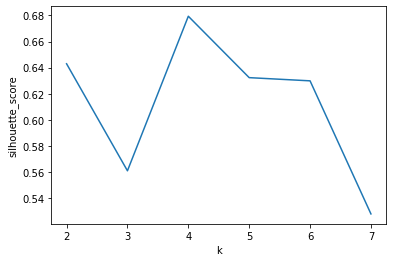

In [20]:
plt.plot(range(2,8),sil)
plt.xlabel('k')
plt.ylabel('silhouette_score')

# 商城客户细分数据

## 分析流程

## 导包

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go

In [2]:
from sklearn.cluster import KMeans
import warnings
import os

In [3]:
warnings.filterwarnings("ignore")

## 数据探索

In [4]:
df=pd.read_csv("C:/Users/Administrator/Desktop/python/机器学习/Mall_Customers.csv")

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe(percentiles=[0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,25%,50%,75%,90%,99%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,180.1,198.01,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,59.1,69.01,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,93.4,126.11,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,87.1,97.01,99.0


## 修改列名

In [7]:
d={'CustomerID':'用户ID','Age':'年龄','Annual Income (k$)':'年收入','Spending Score (1-100)':'花费分数'}

In [8]:
df.rename(columns=d,inplace=True)

In [9]:
df

,用户ID,Gender,年龄,年收入,花费分数
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


## 数据可视化

### 连续变量的分布密度曲线

In [10]:
plt.style.use("seaborn")

In [11]:
plt.rcParams['font.family'] = ['Arial Unicode MS'] #正常显示中文

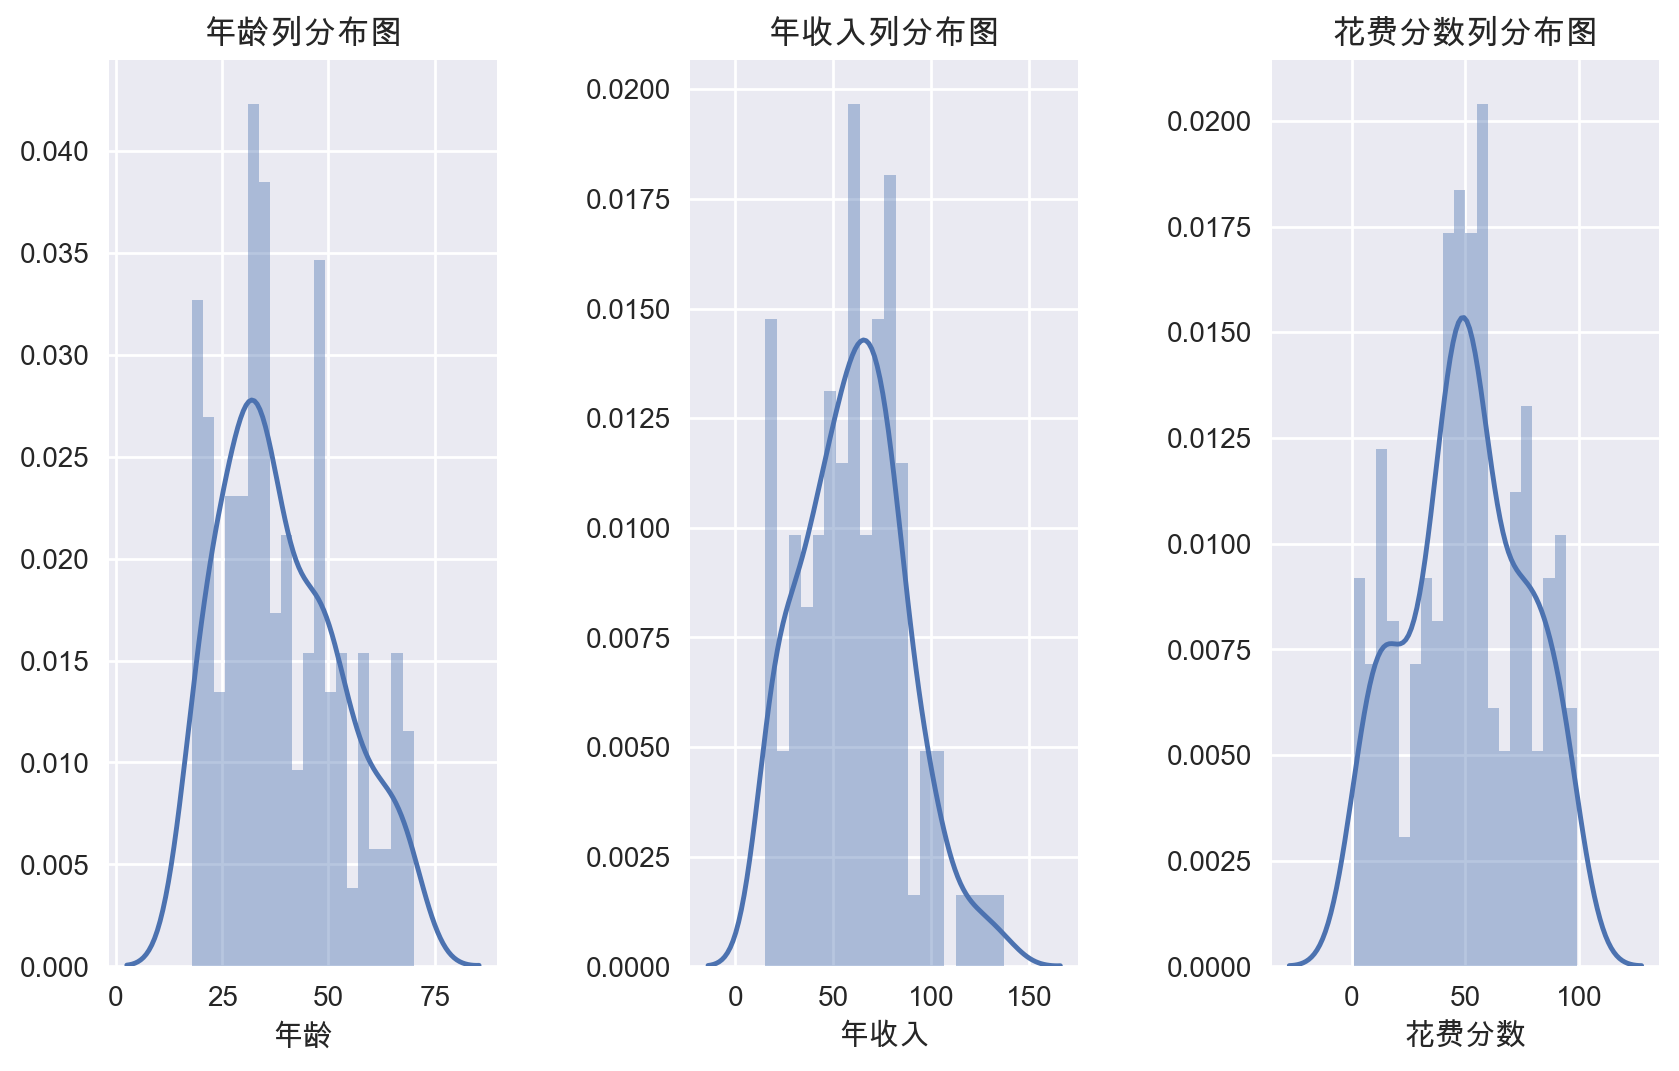

In [12]:
plt.figure(1,figsize=(10,6),dpi=200)
n=0
for x in['年龄','年收入','花费分数']:
    n +=1
    plt.subplot(1,3,n)
    sns.distplot(df[x],bins=20)
    plt.subplots_adjust(hspace=0.5, wspace= 0.5)
    plt.title('{}列分布图'.format(x))

### 分类型数据的分布情况

In [13]:
df.columns

Index(['用户ID', 'Gender', '年龄', '年收入', '花费分数'], dtype='object')

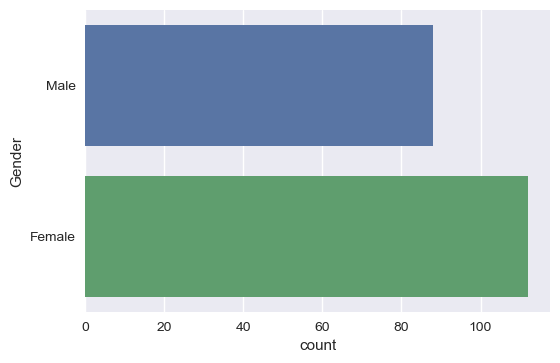

In [14]:
plt.figure(figsize=(6,4),dpi=100)
sns.countplot(y=df['Gender'])

### 探索连续变量的相关性

In [15]:
df.corr()

,用户ID,年龄,年收入,花费分数
用户ID,1.000000,-0.026763,0.977548,0.013835
年龄,-0.026763,1.000000,-0.012398,-0.327227
年收入,0.977548,-0.012398,1.000000,0.009903
花费分数,0.013835,-0.327227,0.009903,1.000000


<Figure size 2400x1800 with 0 Axes>

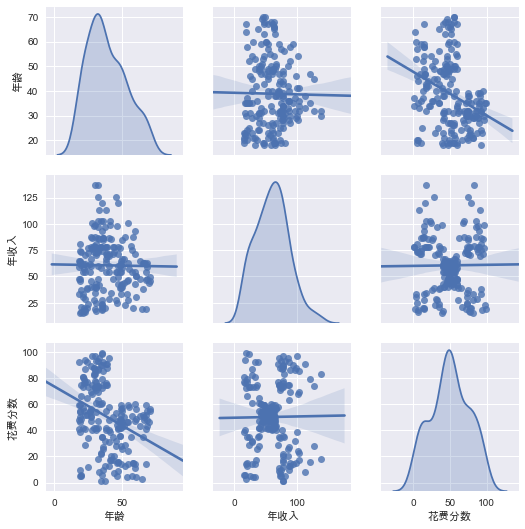

In [16]:
plt.figure(figsize=(8,6),dpi=300)
sns.pairplot(df[['年龄','年收入','花费分数']],kind='reg',diag_kind='kde')

### 将性别特征添加到图中

In [17]:
(df.Gender=='Female').astype('int')

0      0
1      0
2      1
3      1
4      1
5      1
6      1
7      1
8      0
9      1
10     0
11     1
12     1
13     1
14     0
15     0
16     1
17     0
18     0
19     1
20     0
21     0
22     1
23     0
24     1
25     0
26     1
27     0
28     1
29     1
      ..
170    0
171    0
172    0
173    0
174    1
175    1
176    0
177    0
178    0
179    0
180    1
181    1
182    0
183    1
184    1
185    0
186    1
187    0
188    1
189    1
190    1
191    1
192    0
193    1
194    1
195    1
196    1
197    0
198    0
199    0
Name: Gender, Length: 200, dtype: int32

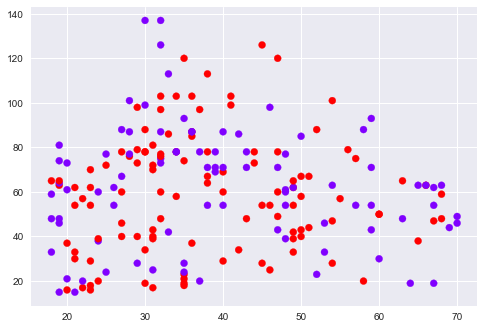

In [18]:
#绘制年龄、年收入、花费分数的关系
plt.scatter(df.年龄,df.年收入,c=(df.Gender=='Female').astype('int'),cmap='rainbow')

In [19]:
df[df.Gender=='Female']

,用户ID,Gender,年龄,年收入,花费分数
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
9,10,Female,30,19,72
11,12,Female,35,19,99
12,13,Female,58,20,15
13,14,Female,24,20,77


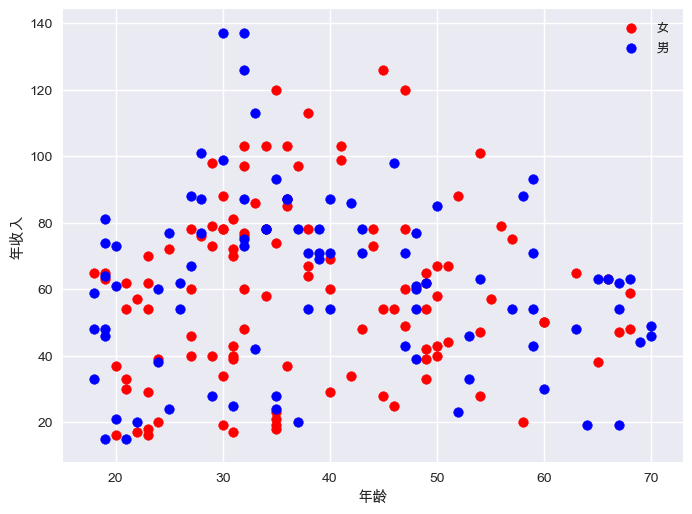

In [20]:
#绘制年龄、年收入、花费分数的关系
plt.figure(figsize=(8,6),dpi=100)
plt.scatter(x='年龄',y='年收入',data=df[df.Gender=='Female'],c='red',label='女')
plt.scatter(x='年龄',y='年收入',data=df[df.Gender=='Male'],c='blue',label='男')
plt.xlabel('年龄')
plt.ylabel('年收入')
plt.legend()

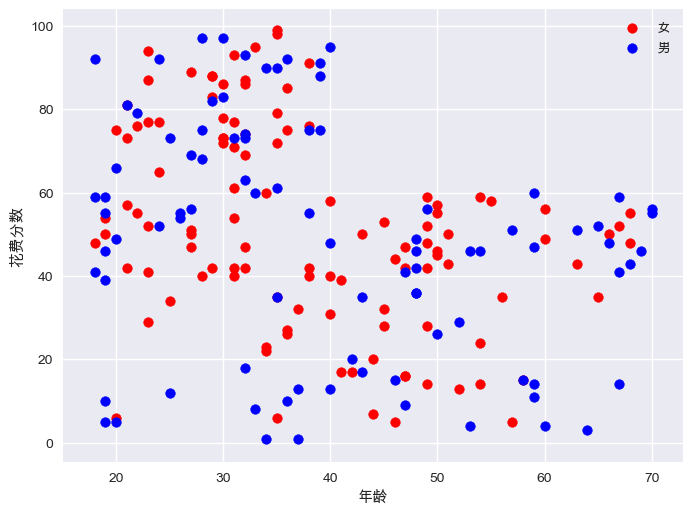

In [21]:
#绘制年龄、花费分数的关系
plt.figure(figsize=(8,6),dpi=100)
plt.scatter(x='年龄',y='花费分数',data=df[df.Gender=='Female'],c='red',label='女')
plt.scatter(x='年龄',y='花费分数',data=df[df.Gender=='Male'],c='blue',label='男')
plt.xlabel('年龄')
plt.ylabel('花费分数')
plt.legend()

### 不同性别的三个维度的绘制

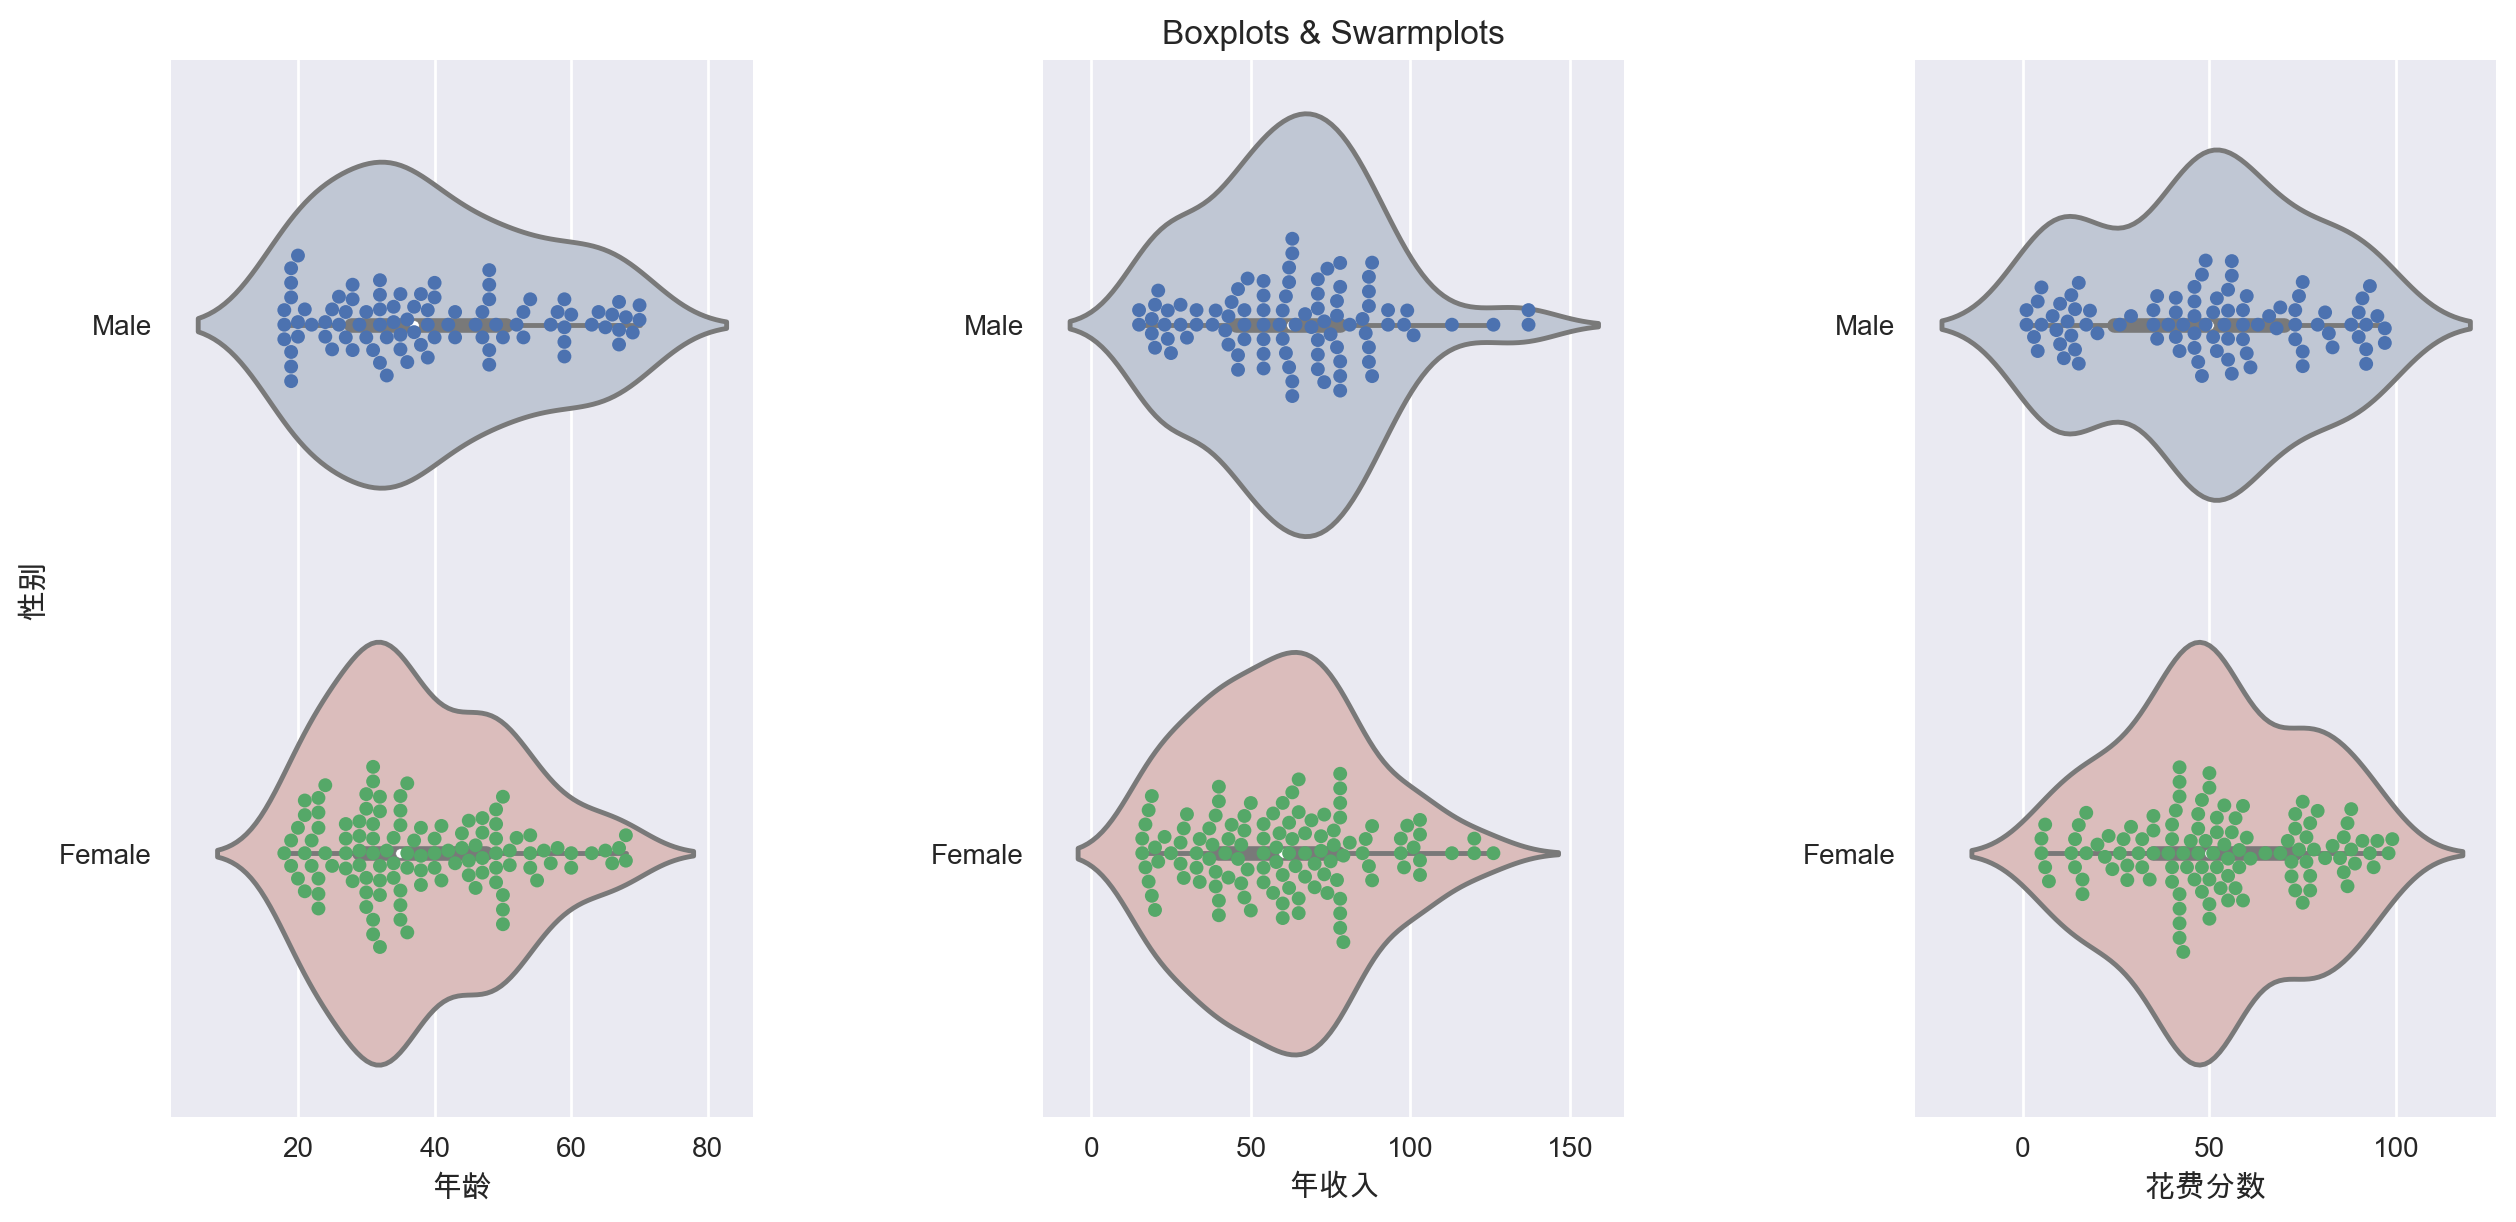

In [22]:
plt.figure(1 , figsize = (15 , 7),dpi=200)
n = 0 
for cols in ['年龄' , '年收入' , '花费分数']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('性别' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

## kmeans聚类

### 单独使用年龄和花费分数进行聚类

In [23]:
X1=df[['年龄','花费分数']].values
X1

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

In [24]:
#绘制学习曲线
inertias=[]
for i in range(2,11):
#聚类成3类，fit_predict()可以直接用
    kmeans=KMeans(n_clusters=i,random_state=666)
    y_pred=kmeans.fit_predict(X1)
#样本组建距离平方和
    inertias.append(kmeans.inertia_)

Text(0, 0.5, 'inertias')

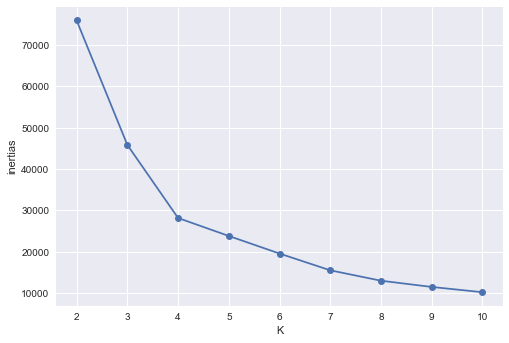

In [25]:
plt.plot(range(2,11),inertias,marker='o')
plt.xlabel('K')
plt.ylabel('inertias')

### 根据k=4确定超参数的值

In [26]:
kmeans4=KMeans(n_clusters=4,random_state=666)

In [27]:
y_pred=kmeans4.fit_predict(X1)

In [28]:
y_pred

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [29]:
centers4=kmeans4.cluster_centers_

In [30]:
labels4=kmeans4.labels_

In [31]:
centers4

array([[55.70833333, 48.22916667],
       [43.29166667, 15.02083333],
       [30.1754386 , 82.35087719],
       [27.61702128, 49.14893617]])

### 将建好的模型可视化

Text(0, 0.5, '花费分数')

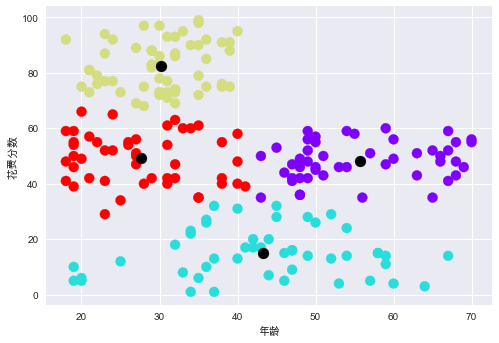

In [32]:
plt.scatter(x='年龄',y='花费分数',data=df,c=labels4,marker='o',s=100,cmap='rainbow')
plt.scatter(centers4[:,0],centers4[:,1],c='k',s=120)
plt.xlabel('年龄')
plt.ylabel('花费分数')

#### 绘制网格

In [33]:
h = 0.02
x_min=X1[:, 0].min() - 1
x_max=X1[:, 0].max() + 1
y_min=X1[:, 1].min() - 1
y_max=X1[:, 1].max() + 1
#
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#### 绘制边界线

Text(0, 0.5, '花费分数')

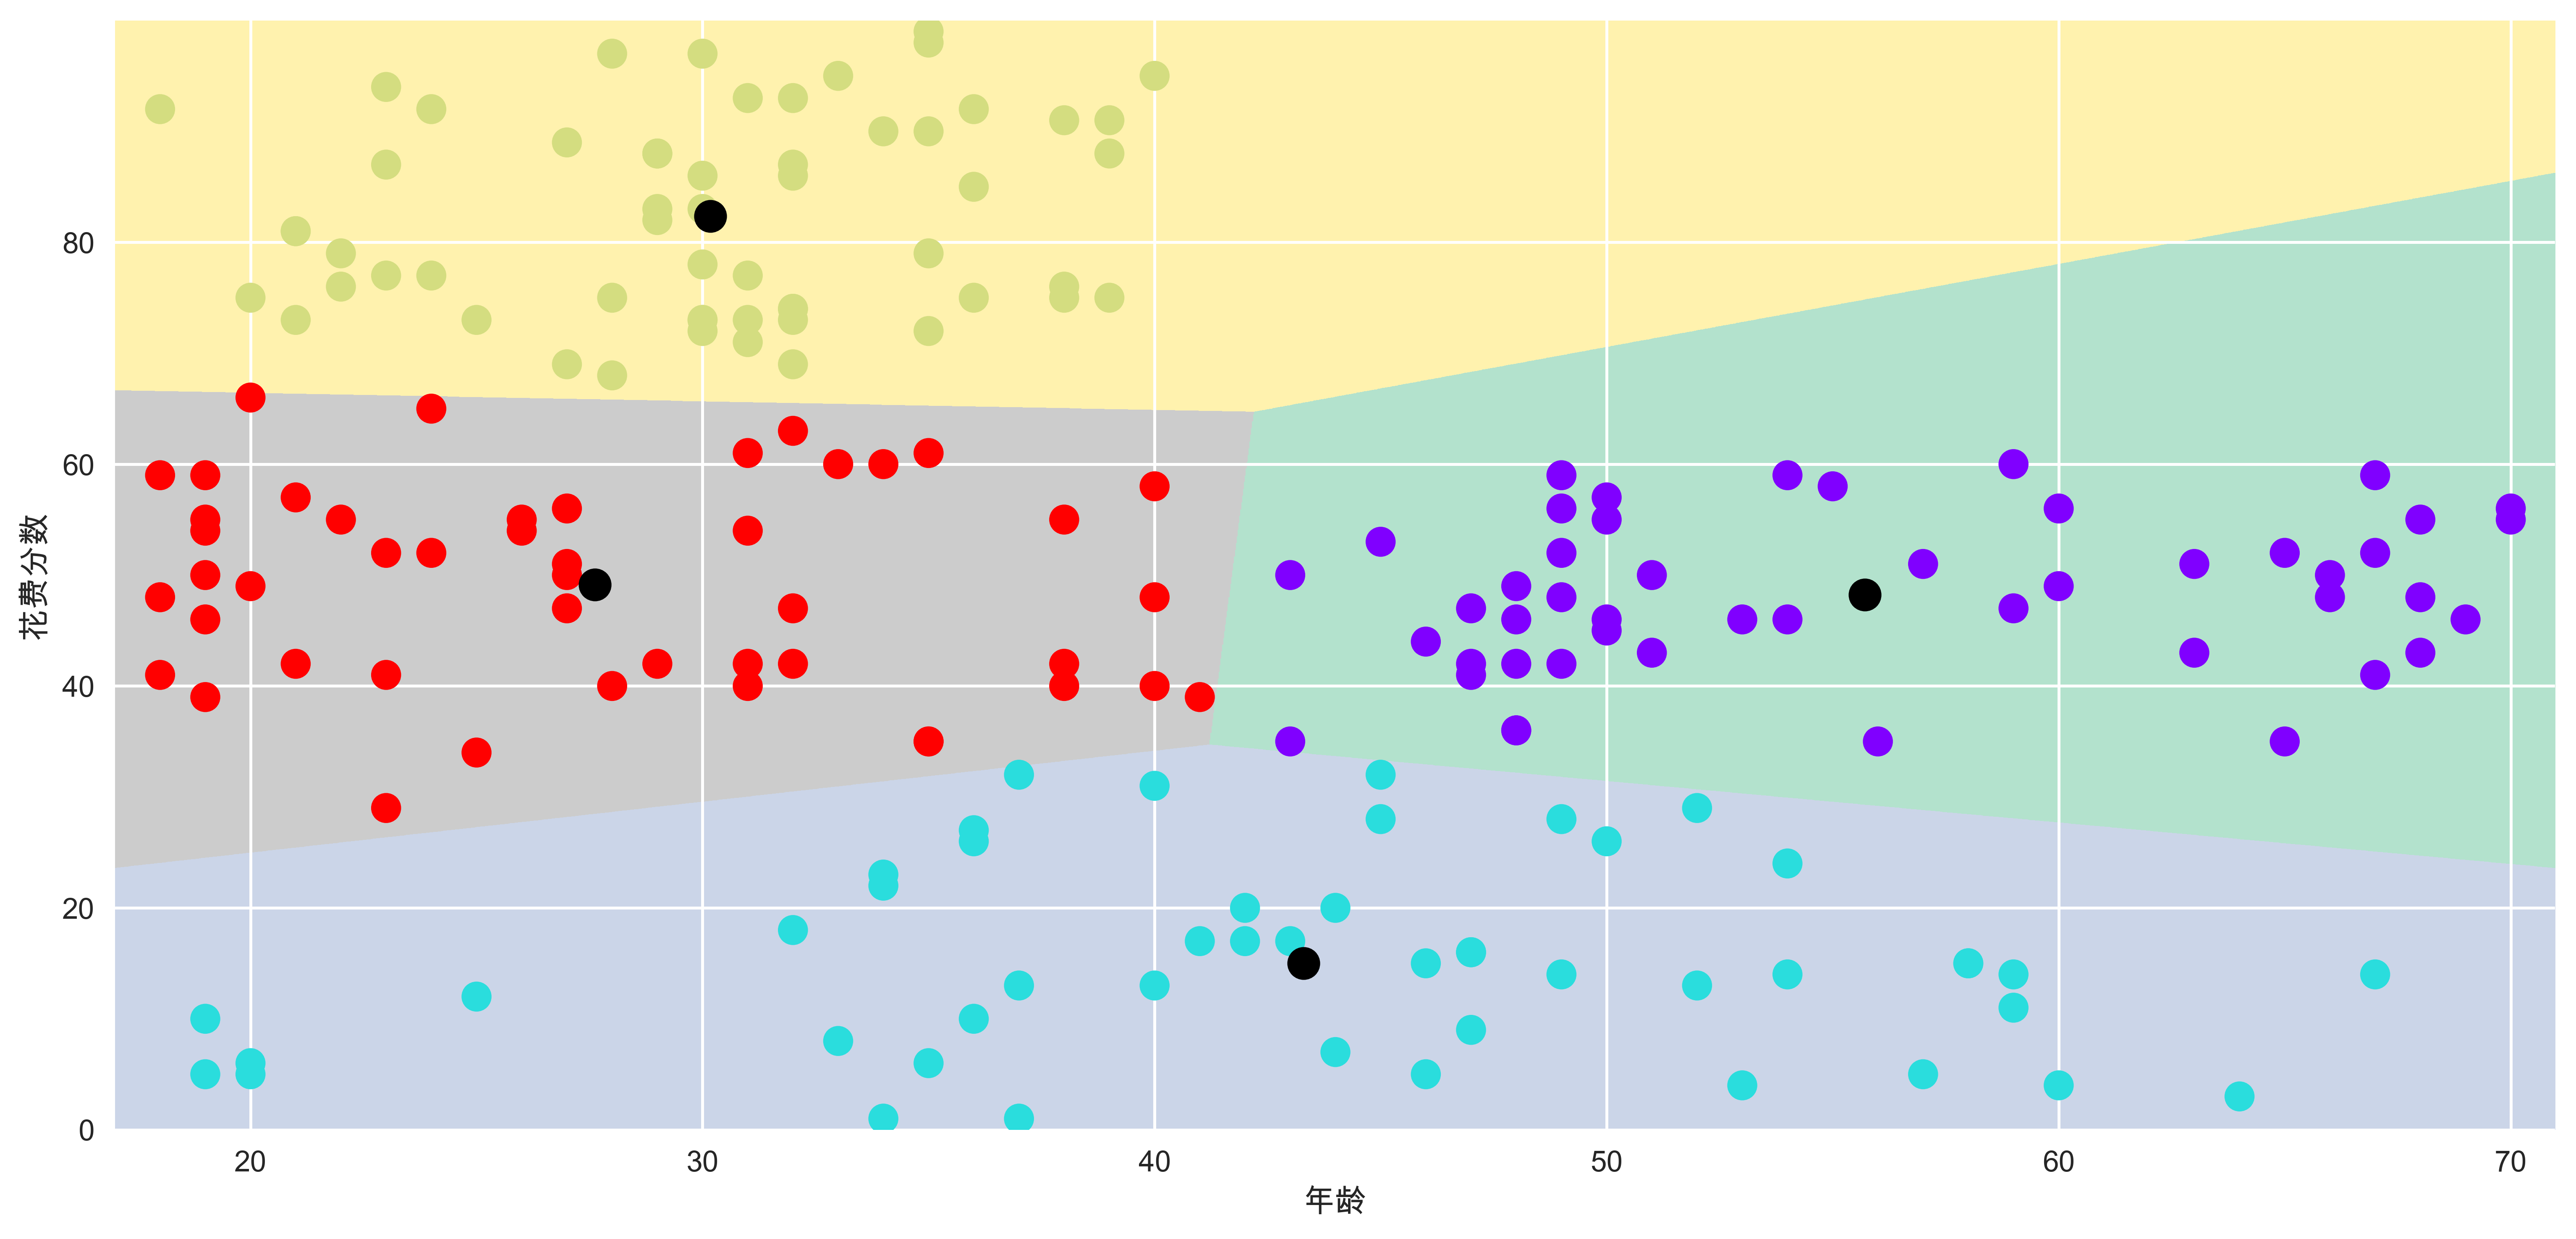

In [34]:
#interpolation插播法用最近邻,extent分别设x-y的最小值和最大值
plt.figure(1 , figsize = (15 , 7) ,dpi=500)
plt.clf()
#新的样本数据都在的界限
z=kmeans4.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)
plt.imshow(z, interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
plt.scatter(x='年龄',y='花费分数',data=df,c=labels4,marker='o',s=100,cmap='rainbow')
#绘制四个中心点
plt.scatter(centers4[:,0],centers4[:,1],c='k',s=120)
plt.xlabel('年龄')
plt.ylabel('花费分数')

### 单独使用年龄和年收入聚类

#### 确定k值

Text(0, 0.5, 'inertias')

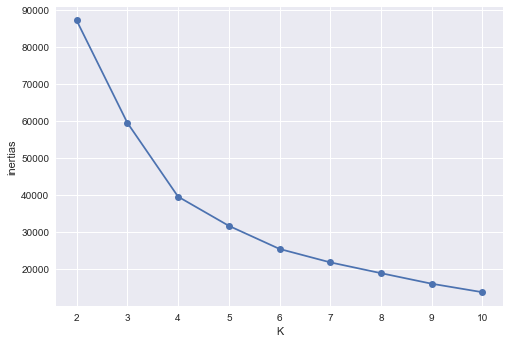

In [35]:
X2=df[['年龄','年收入']].values
#绘制学习曲线
inertias=[]
for i in range(2,11):
#聚类成3类，fit_predict()可以直接用
    kmeans=KMeans(n_clusters=i,random_state=666)
    y_pred=kmeans.fit_predict(X2)
#样本组建距离平方和
    inertias.append(kmeans.inertia_)
plt.plot(range(2,11),inertias,marker='o')
plt.xlabel('K')
plt.ylabel('inertias')

#### 建模

In [36]:
kmeans5=KMeans(n_clusters=5,random_state=666)
y_pred=kmeans5.fit_predict(X2)
centers5=kmeans5.cluster_centers_
labels5=kmeans5.labels_

#### 可视化

Text(0, 0.5, '年收入')

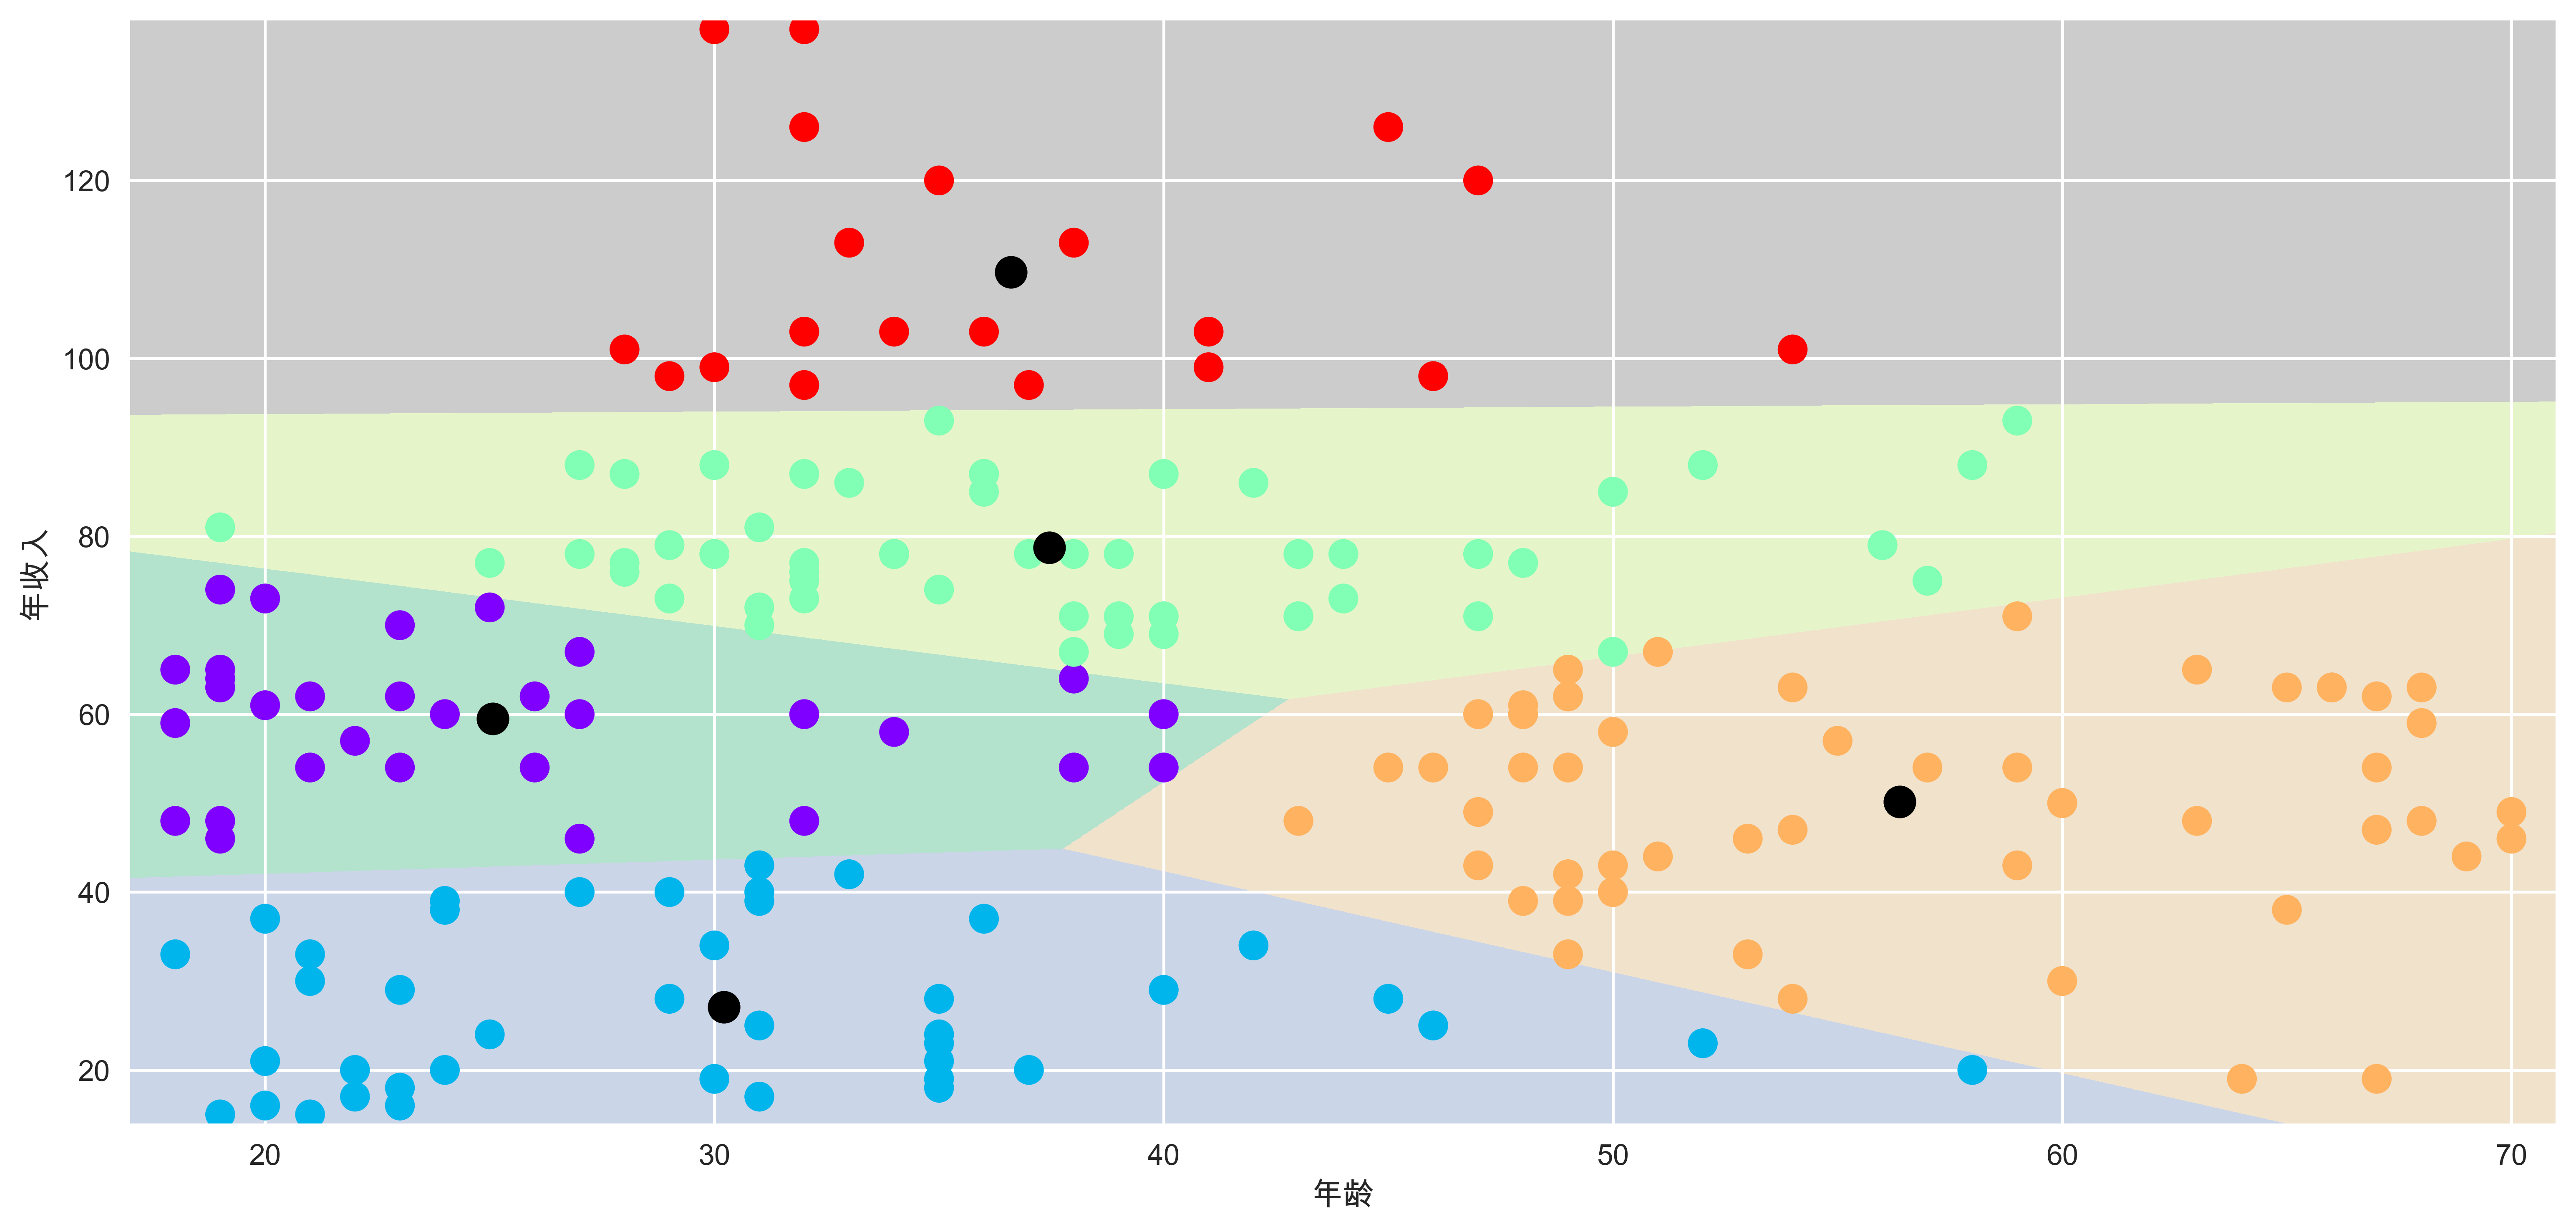

In [37]:
#绘制决策边界
h = 0.02
x_min=X2[:, 0].min() - 1
x_max=X2[:, 0].max() + 1
y_min=X2[:, 1].min() - 1
y_max=X2[:, 1].max() + 1
#
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#interpolation插播法用最近邻,extent分别设x-y的最小值和最大值
plt.figure(1 , figsize = (15 , 7) ,dpi=500)
plt.clf()
#新的样本数据都在的界限
z=kmeans5.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)
plt.imshow(z, interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
plt.scatter(x='年龄',y='年收入',data=df,c=labels5,marker='o',s=100,cmap='rainbow')
#绘制四个中心点
plt.scatter(centers5[:,0],centers5[:,1],c='k',s=120)
plt.xlabel('年龄')
plt.ylabel('年收入')

### 单独使用年收入和花费分数进行聚类

#### 确定k值

Text(0, 0.5, 'inertias')

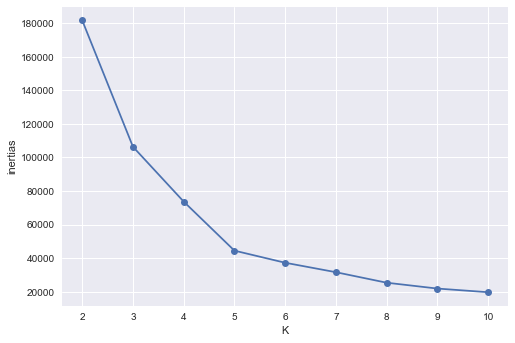

In [38]:
X3=df[['年收入','花费分数']].values
#绘制学习曲线
inertias=[]
for i in range(2,11):
#聚类成3类，fit_predict()可以直接用
    kmeans=KMeans(n_clusters=i,random_state=666)
    y_pred=kmeans.fit_predict(X3)
#样本组建距离平方和
    inertias.append(kmeans.inertia_)
plt.plot(range(2,11),inertias,marker='o')
plt.xlabel('K')
plt.ylabel('inertias')

#### 建模

In [39]:
kmeans5=KMeans(n_clusters=5,random_state=666)
y_pred=kmeans5.fit_predict(X3)
centers5=kmeans5.cluster_centers_
labels5=kmeans5.labels_

#### 可视化

Text(0, 0.5, '花费分数')

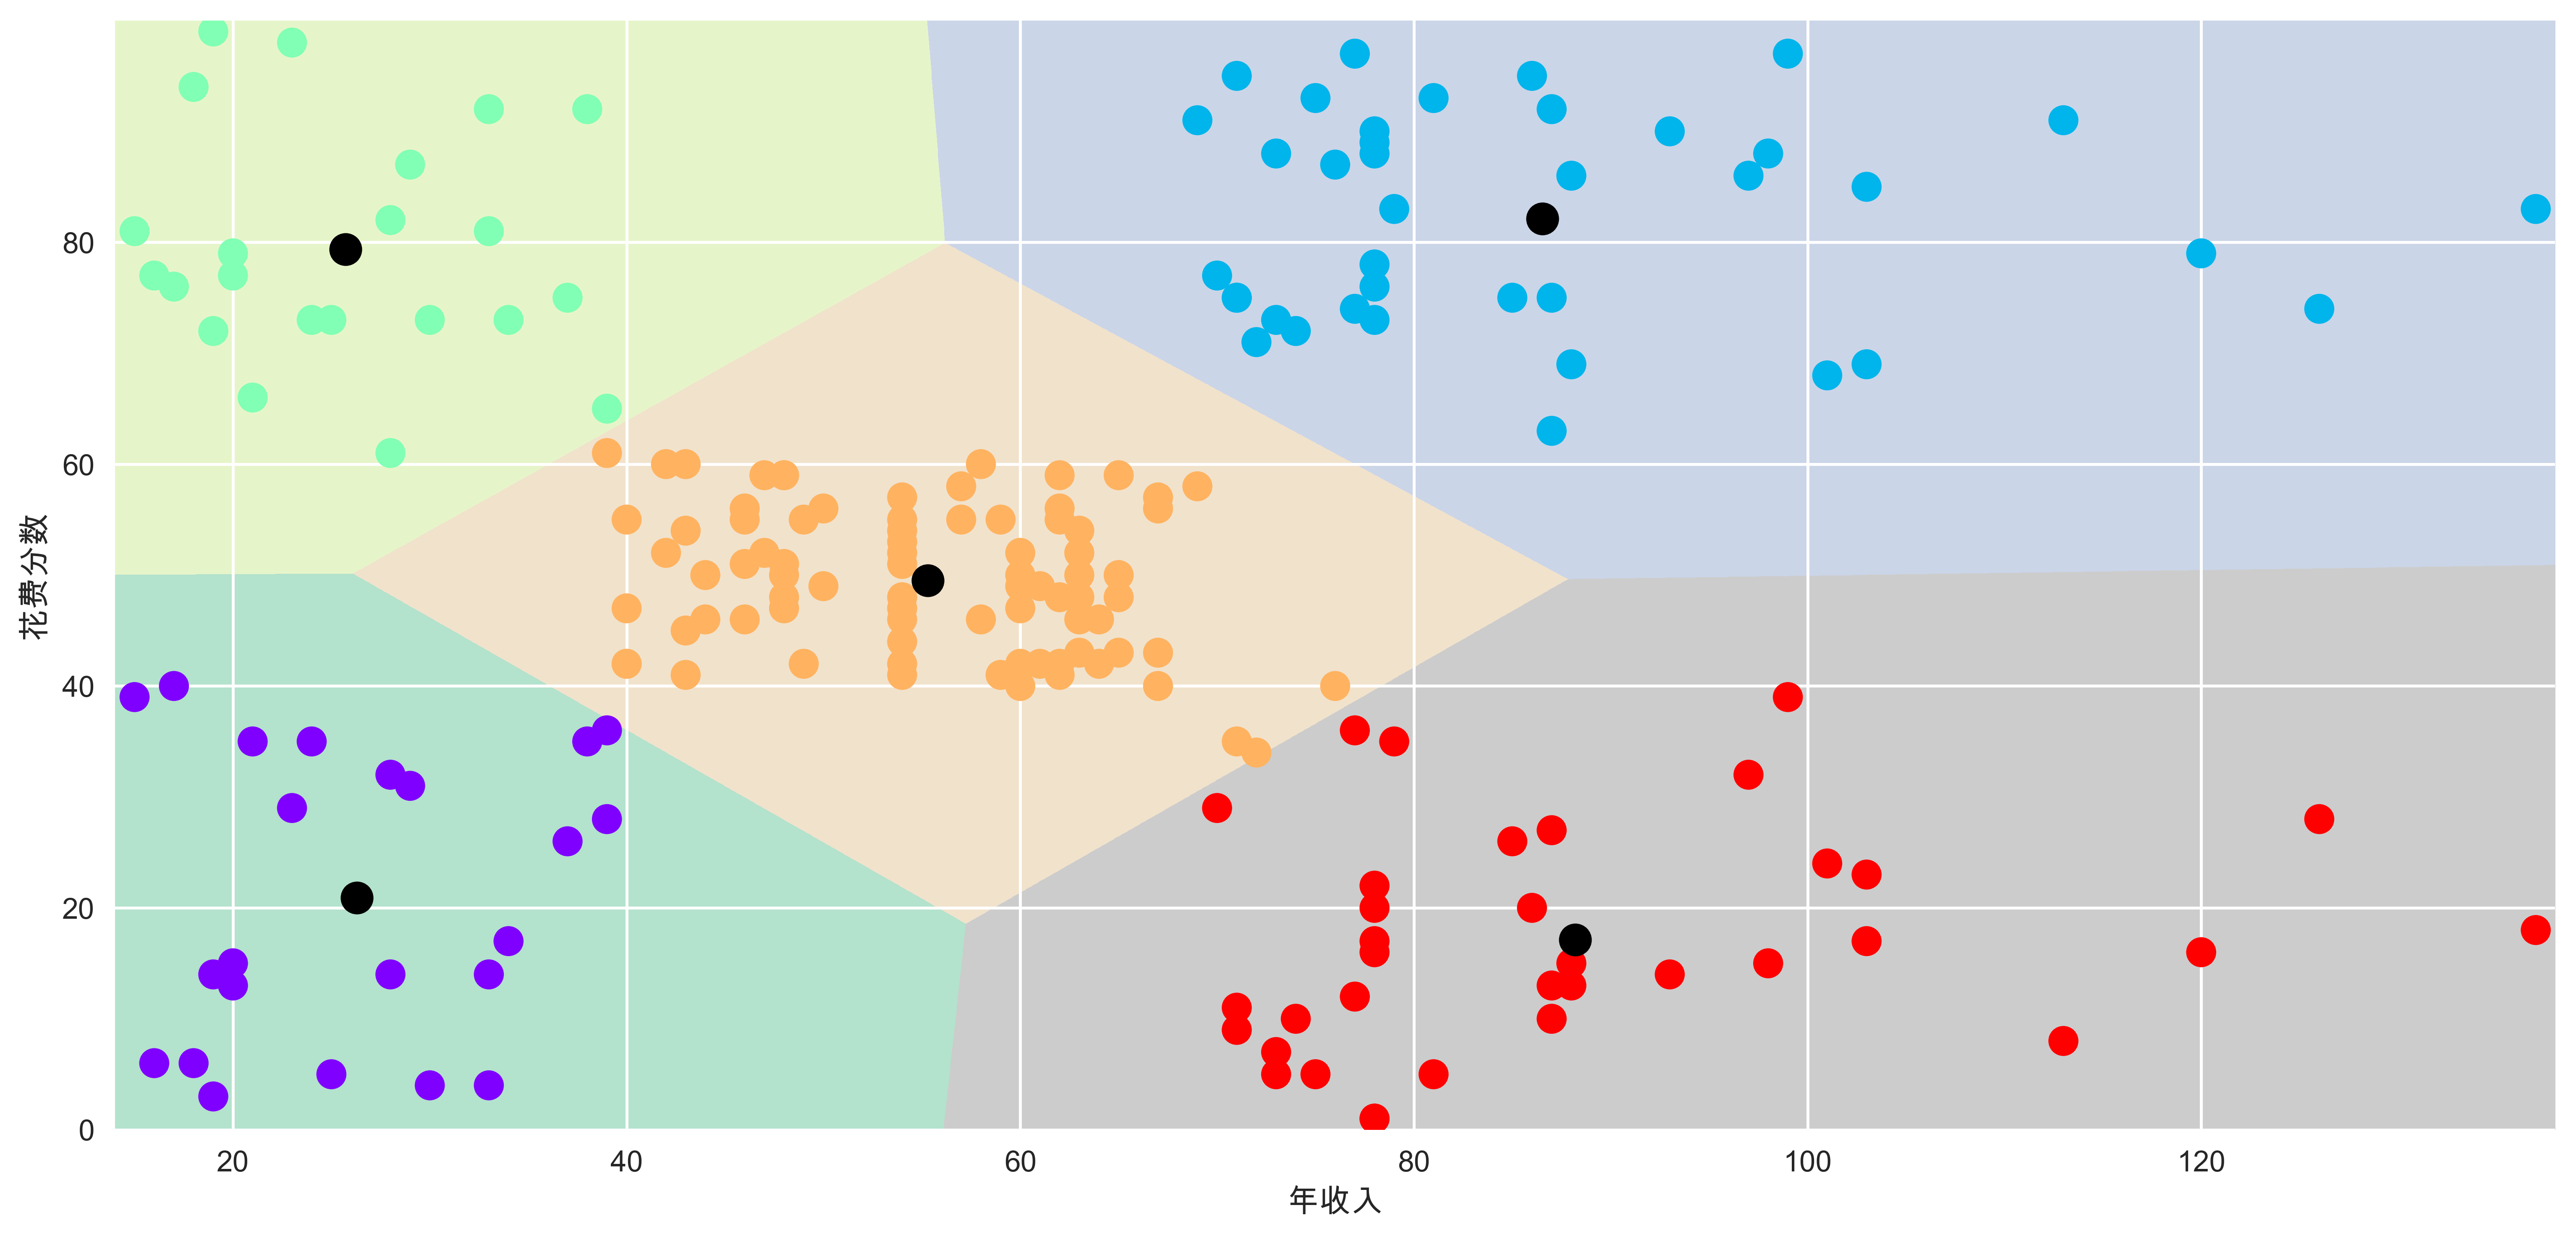

In [40]:
#绘制决策边界
h = 0.02
x_min=X3[:, 0].min() - 1
x_max=X3[:, 0].max() + 1
y_min=X3[:, 1].min() - 1
y_max=X3[:, 1].max() + 1
#
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#interpolation插播法用最近邻,extent分别设x-y的最小值和最大值
plt.figure(1 , figsize = (15 , 7) ,dpi=500)
plt.clf()
#新的样本数据都在的界限
z=kmeans5.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)
plt.imshow(z, interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
plt.scatter(x='年收入',y='花费分数',data=df,c=labels5,marker='o',s=100,cmap='rainbow')
#绘制四个中心点
plt.scatter(centers5[:,0],centers5[:,1],c='k',s=120)
plt.xlabel('年收入')
plt.ylabel('花费分数')

# 基于聚类的推荐系统

## 导入包和读取数据

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_orders=pd.read_csv("C:/Users/Administrator/Desktop/python/推荐系统案例_菊安酱/data/orders.csv")

In [3]:
df_orders.shape

(3989, 46)

In [4]:
df_items=pd.read_csv("C:/Users/Administrator/Desktop/python/推荐系统案例_菊安酱/data/Items_orders.csv")

In [5]:
df_atrr=pd.read_csv("C:/Users/Administrator/Desktop/python/推荐系统案例_菊安酱/data/Items_attribute.csv",encoding='gbk')

## 探索数据

### 处理订单表

In [6]:
df_orders.shape

(3989, 46)

In [68]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3989 entries, 0 to 3988
Data columns (total 46 columns):
订单编号        3989 non-null int64
买家会员名       3989 non-null int64
买家支付宝账号     3988 non-null object
买家应付货款      3989 non-null float64
买家应付邮费      3989 non-null float64
买家支付积分      3989 non-null int64
总金额         3989 non-null float64
返点积分        3989 non-null int64
买家实际支付金额    3989 non-null float64
买家实际支付积分    3989 non-null int64
订单状态        3989 non-null object
买家留言        384 non-null object
收货人姓名       3989 non-null int64
收货地址        3989 non-null object
运送方式        3989 non-null object
联系电话        142 non-null object
联系手机        3986 non-null object
订单创建时间      3989 non-null object
订单付款时间      3989 non-null object
宝贝标题        3989 non-null object
宝贝种类        3989 non-null int64
物流单号        3988 non-null object
物流公司        3988 non-null object
订单备注        460 non-null object
宝贝总数量       3989 non-null int64
店铺Id        3989 non-null int64
店铺名称        3989 non-null int64
订单关闭原因     

#### 去除每列的空格

In [7]:
df_orders.columns

Index(['订单编号', '买家会员名', '买家支付宝账号', '买家应付货款', '买家应付邮费', '买家支付积分', '总金额', '返点积分',
       '买家实际支付金额', '买家实际支付积分', '订单状态', '买家留言', '收货人姓名', '收货地址', '运送方式',
       '联系电话 ', '联系手机', '订单创建时间', '订单付款时间 ', '宝贝标题 ', '宝贝种类', '物流单号 ', '物流公司',
       '订单备注', '宝贝总数量', '店铺Id', '店铺名称', '订单关闭原因', '卖家服务费', '买家服务费', '发票抬头',
       '是否手机订单', '分阶段订单信息', '特权订金订单id', '是否上传合同照片', '是否上传小票', '是否代付', '定金排名',
       '修改后的sku', '修改后的收货地址', '异常信息', '天猫卡券抵扣', '集分宝抵扣', '是否是O2O交易', '退款金额',
       '预约门店'],
      dtype='object')

In [8]:
col=[]
for i in list(df_orders.columns):
    col.append(i.strip())
print(col,len(col))    

['订单编号', '买家会员名', '买家支付宝账号', '买家应付货款', '买家应付邮费', '买家支付积分', '总金额', '返点积分', '买家实际支付金额', '买家实际支付积分', '订单状态', '买家留言', '收货人姓名', '收货地址', '运送方式', '联系电话', '联系手机', '订单创建时间', '订单付款时间', '宝贝标题', '宝贝种类', '物流单号', '物流公司', '订单备注', '宝贝总数量', '店铺Id', '店铺名称', '订单关闭原因', '卖家服务费', '买家服务费', '发票抬头', '是否手机订单', '分阶段订单信息', '特权订金订单id', '是否上传合同照片', '是否上传小票', '是否代付', '定金排名', '修改后的sku', '修改后的收货地址', '异常信息', '天猫卡券抵扣', '集分宝抵扣', '是否是O2O交易', '退款金额', '预约门店'] 46


In [9]:
df_orders.columns=col

#### 基于业务评估对字段进行选择

In [72]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3989 entries, 0 to 3988
Data columns (total 46 columns):
订单编号        3989 non-null int64
买家会员名       3989 non-null int64
买家支付宝账号     3988 non-null object
买家应付货款      3989 non-null float64
买家应付邮费      3989 non-null float64
买家支付积分      3989 non-null int64
总金额         3989 non-null float64
返点积分        3989 non-null int64
买家实际支付金额    3989 non-null float64
买家实际支付积分    3989 non-null int64
订单状态        3989 non-null object
买家留言        384 non-null object
收货人姓名       3989 non-null int64
收货地址        3989 non-null object
运送方式        3989 non-null object
联系电话        142 non-null object
联系手机        3986 non-null object
订单创建时间      3989 non-null object
订单付款时间      3989 non-null object
宝贝标题        3989 non-null object
宝贝种类        3989 non-null int64
物流单号        3988 non-null object
物流公司        3988 non-null object
订单备注        460 non-null object
宝贝总数量       3989 non-null int64
店铺Id        3989 non-null int64
店铺名称        3989 non-null int64
订单关闭原因     

In [73]:
df_orders[df_orders.联系电话.notnull()][['联系电话','联系手机']]
#可以删除联系

,联系电话,联系手机
32,'010-58758375,A56AA8980CB
41,'010-63036426,AC8A0ACD009
73,'182217-1822177212,A8BBA77BAB6
88,'0760-23860692,NaN
98,'0438-6180034,AC9DC878DA7
156,'0593-2082566,ACCB895CA77
198,'0663-2558099,A5975A7A8B8
201,'0771-8536777,A8577AB9586
210,'0535-1510657-4707,A5A0657D707
250,'0793-1507933137,A5079CCAC7D


In [74]:
(df_orders.总金额==df_orders.买家实际支付金额).value_counts()

True     3943
False      46
dtype: int64

In [75]:
df_orders[df_orders.总金额!=df_orders.买家实际支付金额]

,订单编号,买家会员名,买家支付宝账号,买家应付货款,买家应付邮费,买家支付积分,总金额,返点积分,买家实际支付金额,买家实际支付积分,...,是否代付,定金排名,修改后的sku,修改后的收货地址,异常信息,天猫卡券抵扣,集分宝抵扣,是否是O2O交易,退款金额,预约门店
112,21072763406286400,1803,A77BB74B7B0,107.08,0.0,0,107.08,0,104.10,0,...,否,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.98,NaN
228,23794310267368000,466,A5766C68B85,75.50,0.0,0,75.50,0,59.10,0,...,否,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.40,NaN
470,23300528991848400,2672,A5C8AAA0AA0,91.78,0.0,0,91.78,0,52.45,0,...,否,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.33,NaN
540,23186468899456700,1407,A564BB7678C,96.47,0.0,0,96.47,0,20.88,0,...,否,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.59,NaN
563,23157190921251600,2319,AC67BBA8ACB,56.15,0.0,0,56.15,0,53.64,0,...,否,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.51,NaN
595,19783060401496200,1811,AC7BA095570,195.00,0.0,0,195.00,0,120.90,0,...,否,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.10,NaN
599,19805022816114000,1145,AA97AABC6Bqq,8.90,5.0,0,13.90,0,0.00,0,...,否,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.90,NaN
782,19309300762666800,1066,A50BC49A78A,169.28,0.0,0,169.28,0,84.04,0,...,否,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.24,NaN
799,19280062476948800,712,A5975604A5BAC9,119.57,0.0,0,119.57,0,113.73,0,...,否,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.84,NaN
1080,18643981250261300,2598,BA058C5C67qq,31.80,5.0,0,36.80,0,35.21,0,...,否,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.59,NaN


#### 删除不重要字段

In [10]:
#基于业务对字段进行评估
col1 = ['买家支付宝账号', '买家应付货款', '买家应付邮费', '买家支付积分', '总金额', '返点积分', 
        '运送方式', '联系电话', '联系手机', '物流单号', '物流公司', '店铺Id', '店铺名称']
col1

['买家支付宝账号',
 '买家应付货款',
 '买家应付邮费',
 '买家支付积分',
 '总金额',
 '返点积分',
 '运送方式',
 '联系电话',
 '联系手机',
 '物流单号',
 '物流公司',
 '店铺Id',
 '店铺名称']

In [11]:
df_orders.drop(columns=col1,inplace=True)

In [12]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3989 entries, 0 to 3988
Data columns (total 33 columns):
订单编号        3989 non-null int64
买家会员名       3989 non-null int64
买家实际支付金额    3989 non-null float64
买家实际支付积分    3989 non-null int64
订单状态        3989 non-null object
买家留言        384 non-null object
收货人姓名       3989 non-null int64
收货地址        3989 non-null object
订单创建时间      3989 non-null object
订单付款时间      3989 non-null object
宝贝标题        3989 non-null object
宝贝种类        3989 non-null int64
订单备注        460 non-null object
宝贝总数量       3989 non-null int64
订单关闭原因      3989 non-null object
卖家服务费       3989 non-null int64
买家服务费       3989 non-null object
发票抬头        0 non-null float64
是否手机订单      3728 non-null object
分阶段订单信息     0 non-null float64
特权订金订单id    0 non-null float64
是否上传合同照片    3989 non-null object
是否上传小票      3989 non-null object
是否代付        3989 non-null object
定金排名        0 non-null float64
修改后的sku     0 non-null float64
修改后的收货地址    61 non-null object
异常信息        0 non-null

#### 处理修改后的地址和收货地址

In [13]:
adress_id=df_orders[df_orders.修改后的收货地址.notnull()][['收货地址','修改后的收货地址']].index

In [14]:
df_orders.收货地址[75]

'湖北省 武汉市 江夏区 江夏区经济开发区庙山办事处湖北省武汉市江夏庙山经济开发区邬树村明泽街2号中州府生态酒店(430200)'

In [15]:
df_orders.修改后的收货地址[75]

'湖北省 武汉市 新洲区    道观河旅游大道200号'

In [16]:
for i in adress_id:
    df_orders.收货地址[i]=df_orders.修改后的收货地址[i]    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
df_orders.收货地址[75]

'湖北省 武汉市 新洲区    道观河旅游大道200号'

#### 处理缺失值较多的字段

In [18]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3989 entries, 0 to 3988
Data columns (total 33 columns):
订单编号        3989 non-null int64
买家会员名       3989 non-null int64
买家实际支付金额    3989 non-null float64
买家实际支付积分    3989 non-null int64
订单状态        3989 non-null object
买家留言        384 non-null object
收货人姓名       3989 non-null int64
收货地址        3989 non-null object
订单创建时间      3989 non-null object
订单付款时间      3989 non-null object
宝贝标题        3989 non-null object
宝贝种类        3989 non-null int64
订单备注        460 non-null object
宝贝总数量       3989 non-null int64
订单关闭原因      3989 non-null object
卖家服务费       3989 non-null int64
买家服务费       3989 non-null object
发票抬头        0 non-null float64
是否手机订单      3728 non-null object
分阶段订单信息     0 non-null float64
特权订金订单id    0 non-null float64
是否上传合同照片    3989 non-null object
是否上传小票      3989 non-null object
是否代付        3989 non-null object
定金排名        0 non-null float64
修改后的sku     0 non-null float64
修改后的收货地址    61 non-null object
异常信息        0 non-null

In [19]:
df_orders.isnull().mean()>0.8

订单编号        False
买家会员名       False
买家实际支付金额    False
买家实际支付积分    False
订单状态        False
买家留言         True
收货人姓名       False
收货地址        False
订单创建时间      False
订单付款时间      False
宝贝标题        False
宝贝种类        False
订单备注         True
宝贝总数量       False
订单关闭原因      False
卖家服务费       False
买家服务费       False
发票抬头         True
是否手机订单      False
分阶段订单信息      True
特权订金订单id     True
是否上传合同照片    False
是否上传小票      False
是否代付        False
定金排名         True
修改后的sku      True
修改后的收货地址     True
异常信息         True
天猫卡券抵扣       True
集分宝抵扣        True
是否是O2O交易     True
退款金额        False
预约门店         True
dtype: bool

In [20]:
#找到缺失值大于80%的字段进行分析
orders_drop1=pd.DataFrame(data=df_orders.isnull().mean()>0.8).rename(columns={0:'真假'})

In [21]:
drop1_index=list(orders_drop1[orders_drop1.真假==True].index)

In [22]:
df_orders.drop(columns=drop1_index,inplace=True)

In [23]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3989 entries, 0 to 3988
Data columns (total 20 columns):
订单编号        3989 non-null int64
买家会员名       3989 non-null int64
买家实际支付金额    3989 non-null float64
买家实际支付积分    3989 non-null int64
订单状态        3989 non-null object
收货人姓名       3989 non-null int64
收货地址        3989 non-null object
订单创建时间      3989 non-null object
订单付款时间      3989 non-null object
宝贝标题        3989 non-null object
宝贝种类        3989 non-null int64
宝贝总数量       3989 non-null int64
订单关闭原因      3989 non-null object
卖家服务费       3989 non-null int64
买家服务费       3989 non-null object
是否手机订单      3728 non-null object
是否上传合同照片    3989 non-null object
是否上传小票      3989 non-null object
是否代付        3989 non-null object
退款金额        3989 non-null float64
dtypes: float64(2), int64(7), object(11)
memory usage: 623.4+ KB


#### 连续特征可视化

In [24]:
df_orders.买家实际支付金额.value_counts()

12.90     124
11.90      58
34.90      44
20.90      33
13.90      28
10.90      23
14.90      21
12.80      20
24.90      19
16.80      19
21.90      18
20.80      16
9.90       16
58.00      15
18.80      15
12.75      14
54.00      14
44.90      13
38.80      13
59.00      13
16.70      12
17.90      11
24.80      11
100.00     10
7.90       10
14.80      10
18.90      10
90.00      10
25.70      10
44.00       9
         ... 
62.24       1
56.98       1
420.60      1
11.45       1
72.20       1
64.68       1
36.15       1
53.14       1
165.32      1
59.36       1
87.91       1
46.87       1
99.60       1
30.26       1
26.77       1
92.79       1
33.37       1
161.60      1
97.84       1
53.53       1
83.11       1
69.87       1
24.33       1
43.34       1
31.35       1
46.20       1
26.97       1
83.42       1
56.90       1
185.41      1
Name: 买家实际支付金额, Length: 2451, dtype: int64

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False

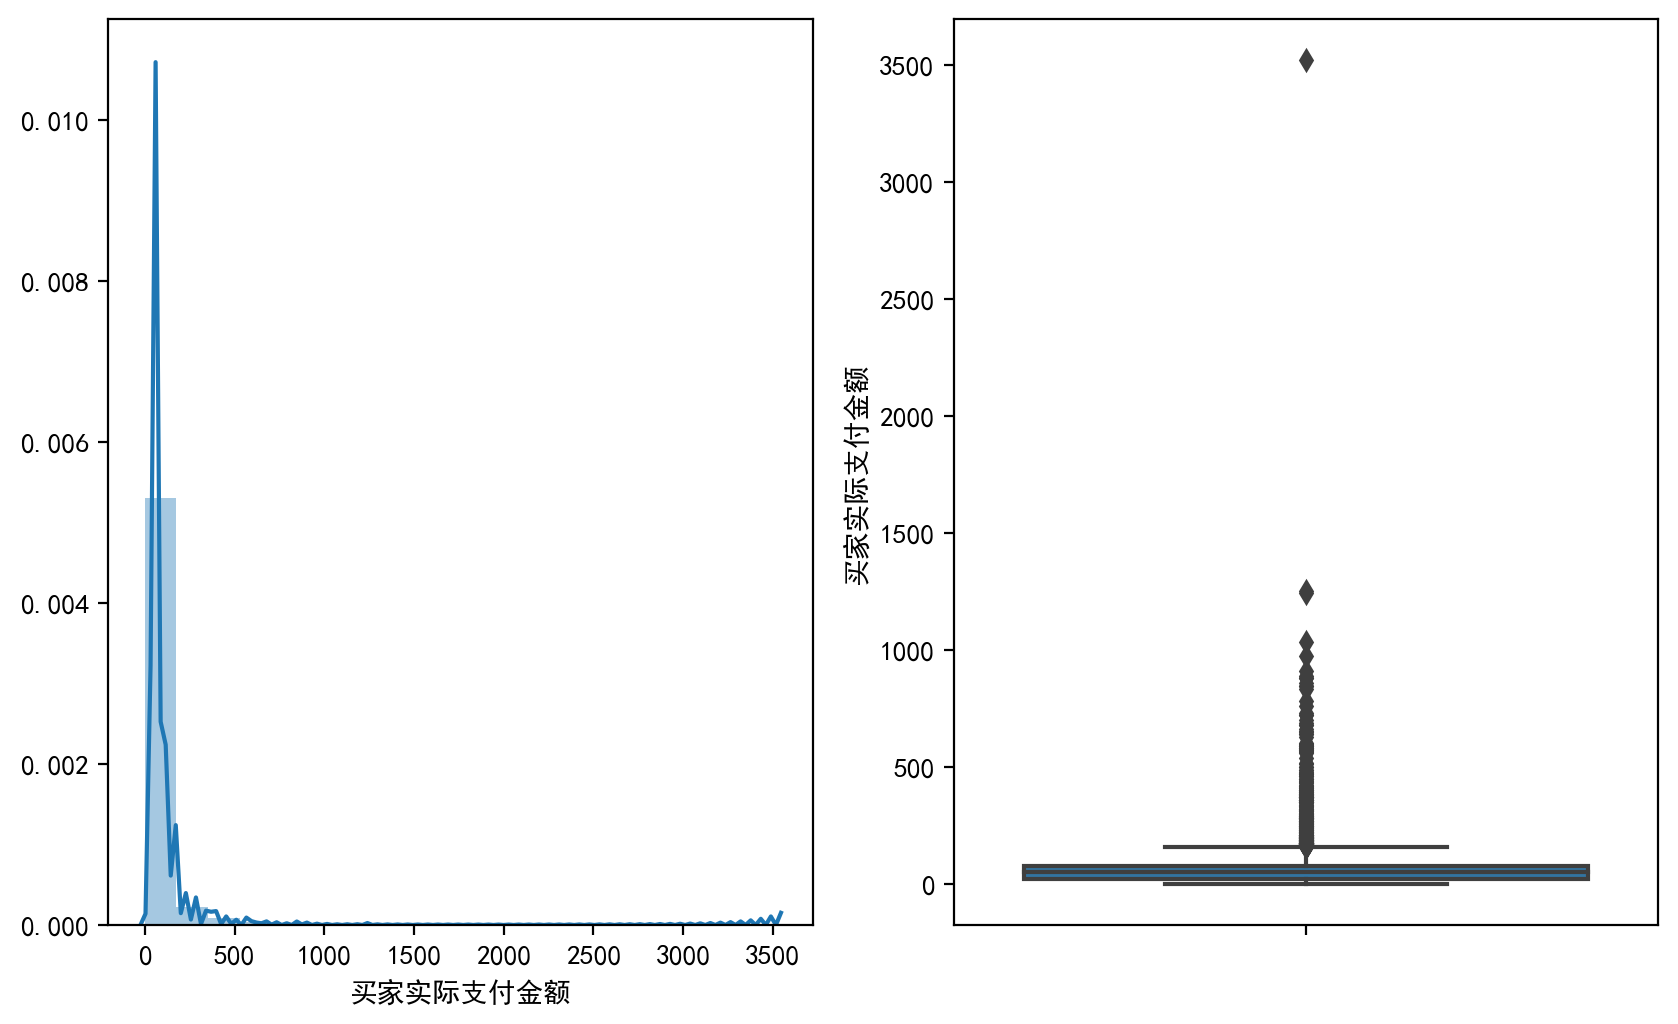

In [26]:
f,(ax1,ax2)=plt.subplots(1,2,figsize=(10,6),dpi=200)
sns.distplot(df_orders.买家实际支付金额,bins=20,ax=ax1)
sns.boxplot(y='买家实际支付金额',data=df_orders,ax=ax2)
#数据处于严重右偏分布状态，存在异常数据，可以用哪些方法处理？

In [27]:
df_orders.买家实际支付金额.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])
#可以发现99%都是正常值，99%后面是非正常值

count    3989.000000
mean       72.613673
std       112.279791
min         0.000000
25%        22.080000
50%        52.320000
75%        77.000000
90%       150.000000
99%       567.360000
max      3521.000000
Name: 买家实际支付金额, dtype: float64

In [28]:
df_orders.买家实际支付金额.sort_values()

599        0.00
3846       1.18
3836       1.49
3849       1.69
3854       1.79
1311       2.00
2646       2.00
2945       2.19
3845       2.29
3844       2.90
3851       3.58
2947       3.58
3843       3.58
3838       3.59
936        3.83
3968       4.56
3837       4.65
3196       4.90
3848       4.90
2839       4.99
2943       4.99
3239       5.00
3841       5.90
2953       5.90
2694       6.00
3059       6.00
3280       6.08
3382       6.26
2811       6.29
1983       6.41
         ...   
3988     597.12
1927     600.00
853      628.00
736      639.33
1533     641.00
2474     650.00
1922     652.00
2867     659.90
892      680.00
957      680.00
3732     687.28
82       700.00
1925     720.00
559      720.00
1258     730.00
2422     760.00
2346     780.00
2208     831.18
1152     844.24
1269     847.60
2454     858.00
1671     880.00
3399     882.00
685      890.00
3313     910.00
2594     974.10
852     1033.00
1119    1245.00
727     1250.00
845     3521.00
Name: 买家实际支付金额, Length: 

#### 确定异常值的界限

In [29]:
# 箱线图的上限，比这个大，就是异常值
# 异常值被定义为小于 Q1-1.5IQR或大于Q3+1.5IQR的值
22-1.5*(77-22)
(77-22)*1.5+77

159.5

In [30]:
df_orders=df_orders[df_orders.买家实际支付金额<1200]#删除了买家实际支付金额的异常值数据

In [97]:
df_orders.shape

(3986, 20)

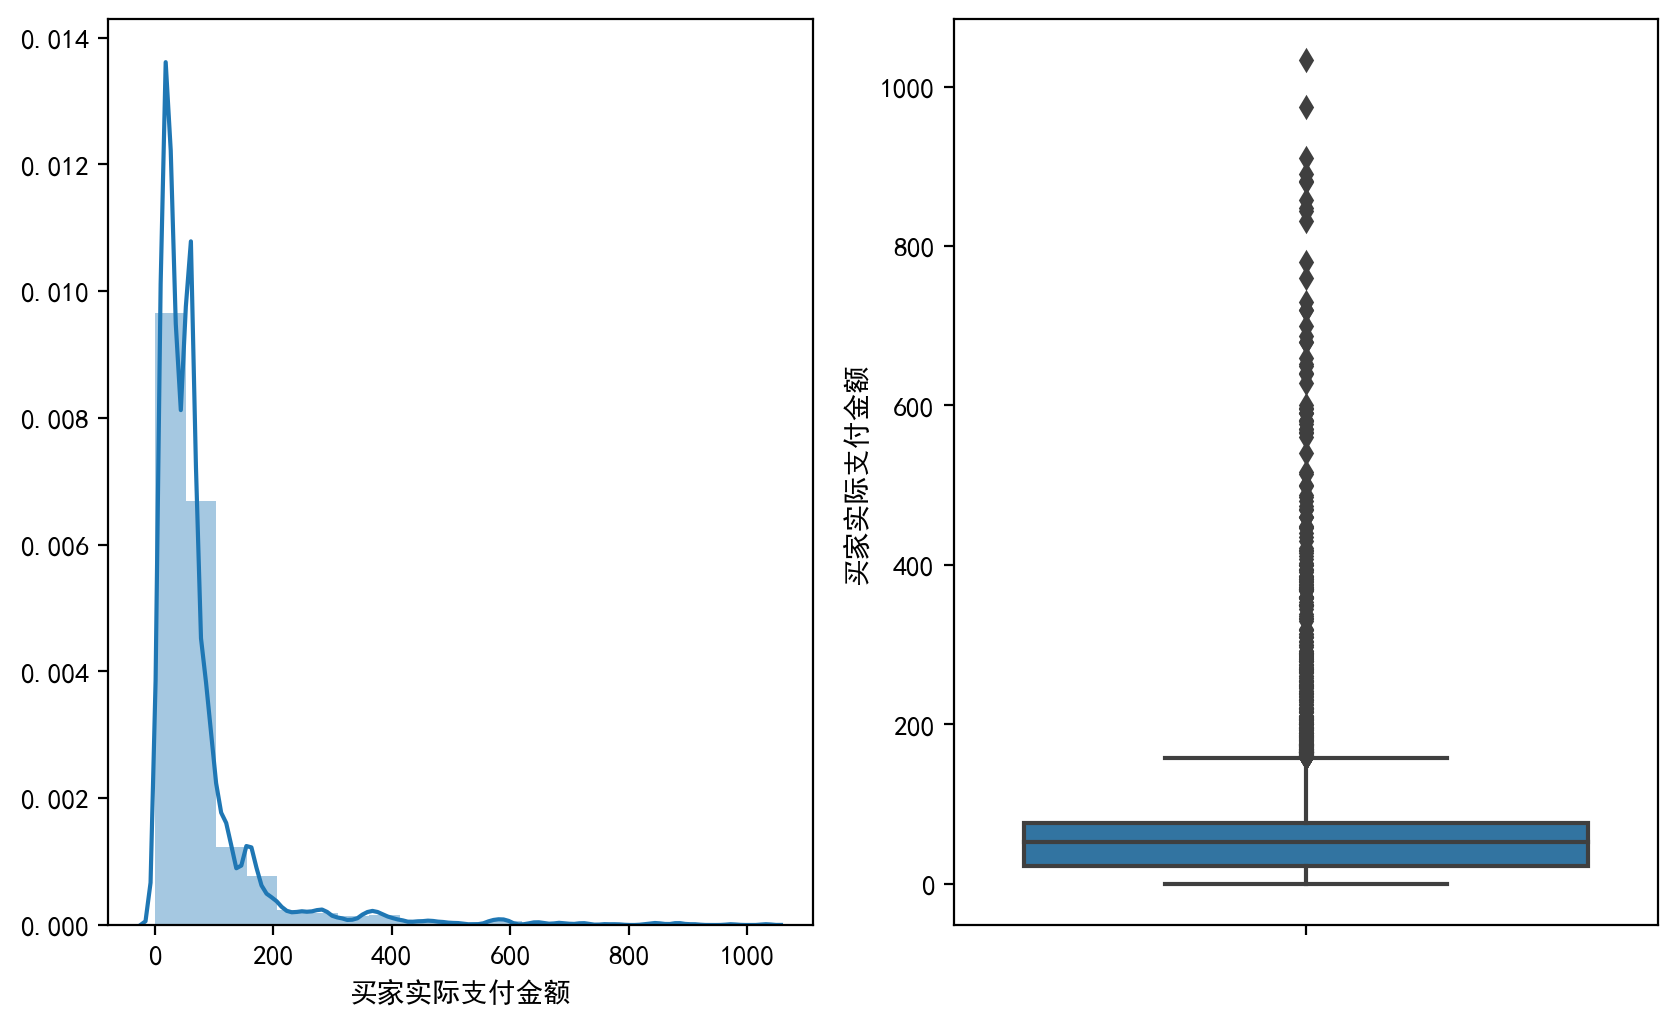

In [31]:
f,(ax1,ax2)=plt.subplots(1,2,figsize=(10,6),dpi=200)
sns.distplot(df_orders.买家实际支付金额,bins=20,ax=ax1)
sns.boxplot(y='买家实际支付金额',data=df_orders,ax=ax2)
#数据仍旧处于右偏分布

#### 查看其他特征值

In [32]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3986 entries, 0 to 3988
Data columns (total 20 columns):
订单编号        3986 non-null int64
买家会员名       3986 non-null int64
买家实际支付金额    3986 non-null float64
买家实际支付积分    3986 non-null int64
订单状态        3986 non-null object
收货人姓名       3986 non-null int64
收货地址        3986 non-null object
订单创建时间      3986 non-null object
订单付款时间      3986 non-null object
宝贝标题        3986 non-null object
宝贝种类        3986 non-null int64
宝贝总数量       3986 non-null int64
订单关闭原因      3986 non-null object
卖家服务费       3986 non-null int64
买家服务费       3986 non-null object
是否手机订单      3727 non-null object
是否上传合同照片    3986 non-null object
是否上传小票      3986 non-null object
是否代付        3986 non-null object
退款金额        3986 non-null float64
dtypes: float64(2), int64(7), object(11)
memory usage: 654.0+ KB


In [33]:
#可删除
df_orders.买家实际支付积分.value_counts()

0    3986
Name: 买家实际支付积分, dtype: int64

In [101]:
df_orders.订单状态.value_counts()

交易成功    3986
Name: 订单状态, dtype: int64

In [34]:
len(df_orders.收货人姓名.value_counts())

3325

#### 删除只有一种状态的特征

In [35]:
for col in df_orders.columns:
    row_=len(df_orders[col].value_counts())
    if row_==1:
        del df_orders[col]   

In [36]:
df_orders.shape

(3986, 11)

In [37]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3986 entries, 0 to 3988
Data columns (total 11 columns):
订单编号        3986 non-null int64
买家会员名       3986 non-null int64
买家实际支付金额    3986 non-null float64
收货人姓名       3986 non-null int64
收货地址        3986 non-null object
订单创建时间      3986 non-null object
订单付款时间      3986 non-null object
宝贝标题        3986 non-null object
宝贝种类        3986 non-null int64
宝贝总数量       3986 non-null int64
退款金额        3986 non-null float64
dtypes: float64(2), int64(5), object(4)
memory usage: 373.7+ KB


#### 买家会员名和收货人姓名处理

In [38]:
df_orders.groupby(by=['买家会员名','收货人姓名']).count()['订单编号'].value_counts()
#意义不大，可删除收货人姓名

1     3076
2      266
3       55
4       20
5        8
7        5
6        4
16       1
10       1
8        1
Name: 订单编号, dtype: int64

In [39]:
df_orders.pop('收货人姓名')

0         33
1       1532
2        826
3        245
4        801
5        577
6       3251
7       1186
8        126
9        627
10      3174
11       790
12      2137
13        82
14      2765
15      2696
16      3157
17      3132
18      3046
19      3046
20      2479
21      2236
22      1638
23      2711
24       696
25      1853
26      1669
27      1719
28      3260
29       742
        ... 
3959    2630
3960    3094
3961    1869
3962     578
3963    2097
3964    2106
3965     791
3966    2355
3967     833
3968       3
3969    2319
3970    3205
3971    1001
3972    1395
3973       3
3974     772
3975     715
3976     100
3977      54
3978    1078
3979      24
3980     452
3981    1481
3982       2
3983    3196
3984    1462
3985    3147
3986    3049
3987    2800
3988    1459
Name: 收货人姓名, Length: 3986, dtype: int64

In [40]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3986 entries, 0 to 3988
Data columns (total 10 columns):
订单编号        3986 non-null int64
买家会员名       3986 non-null int64
买家实际支付金额    3986 non-null float64
收货地址        3986 non-null object
订单创建时间      3986 non-null object
订单付款时间      3986 non-null object
宝贝标题        3986 non-null object
宝贝种类        3986 non-null int64
宝贝总数量       3986 non-null int64
退款金额        3986 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 342.5+ KB


#### 处理订单创建时间和订单付款时间

In [41]:
df_orders[['订单创建时间','订单付款时间']]
#为何要删除订单创建时间和订单付款时间

,订单创建时间,订单付款时间
0,2017/5/30 23:18,2017/5/30 23:18
1,2017/5/30 23:08,2017/5/30 23:08
2,2017/5/30 23:03,2017/5/30 23:03
3,2017/5/30 22:54,2017/5/30 22:54
4,2017/5/30 22:53,2017/5/30 22:53
5,2017/5/30 22:49,2017/5/30 23:18
6,2017/5/30 22:44,2017/5/30 22:44
7,2017/5/30 22:32,2017/5/30 22:32
8,2017/5/30 22:23,2017/5/30 22:23
9,2017/5/30 22:16,2017/5/30 22:17


In [42]:
df_orders.drop(columns=['订单创建时间','订单付款时间','宝贝标题'],inplace=True)

In [43]:
df_orders.pop('退款金额')

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
       ... 
3959    0.0
3960    0.0
3961    0.0
3962    0.0
3963    0.0
3964    0.0
3965    0.0
3966    0.0
3967    0.0
3968    0.0
3969    0.0
3970    0.0
3971    0.0
3972    0.0
3973    0.0
3974    0.0
3975    0.0
3976    0.0
3977    0.0
3978    0.0
3979    0.0
3980    0.0
3981    0.0
3982    0.0
3983    0.0
3984    0.0
3985    0.0
3986    0.0
3987    0.0
3988    0.0
Name: 退款金额, Length: 3986, dtype: float64

#### 处理收货地址

In [44]:
df_orders.head()

,订单编号,买家会员名,买家实际支付金额,收货地址,宝贝种类,宝贝总数量
0,21407300627014900,1425,58.51,广东省 广州市 越秀区 华乐街道环市东路华侨新村光明路28号3a楼（即原文化假日酒店，后易名...,5,59
1,24270488269081200,2163,20.70,江西省 九江市 浔阳区 甘棠街道浔阳东路108号儿童保健康复中心亲子园(332000),2,2
2,21402600386365500,375,12.90,浙江省 宁波市 江东区 新明街道明晨紫月227弄25号401室(315040),1,1
3,21398820349555700,2618,9.81,湖南省 邵阳市 其它区 湖南省邵阳市双清区铁砂岭小学后面(422000),1,1
4,21446781606162100,2012,28.92,安徽省 阜阳市 颍东区 新华街道尚武艺术培训中心(236058),1,8


In [45]:
df_orders.收货地址=df_orders.收货地址.str.split(' ',expand=True)[0]

In [46]:
df_orders.收货地址.value_counts()

广东省         558
浙江省         341
江苏省         295
福建省         249
山东省         196
河南省         188
湖南省         178
江西省         164
湖北省         160
四川省         157
安徽省         142
河北省         140
上海          128
山西省         116
黑龙江省        115
北京          110
广西壮族自治区     110
辽宁省         103
云南省          98
贵州省          84
重庆           84
吉林省          70
陕西省          69
海南省          59
天津           49
内蒙古自治区       15
新疆维吾尔自治区      5
甘肃省           2
青海省           1
Name: 收货地址, dtype: int64

In [47]:
df_orders.head()

,订单编号,买家会员名,买家实际支付金额,收货地址,宝贝种类,宝贝总数量
0,21407300627014900,1425,58.51,广东省,5,59
1,24270488269081200,2163,20.70,江西省,2,2
2,21402600386365500,375,12.90,浙江省,1,1
3,21398820349555700,2618,9.81,湖南省,1,1
4,21446781606162100,2012,28.92,安徽省,1,8


#### 宝贝种类和宝贝总数量数据可视化

In [48]:
df_orders.宝贝种类.value_counts()

1     1528
2      299
3      254
4      244
5      233
6      218
8      157
7      147
9      136
10     121
12      98
11      96
13      72
14      60
15      58
16      39
17      35
18      28
19      25
21      22
20      20
23      14
24      11
22       8
25       7
26       6
27       5
38       5
28       5
29       4
33       4
49       4
36       3
30       3
40       2
37       2
41       2
45       1
32       1
34       1
46       1
48       1
43       1
47       1
31       1
35       1
39       1
50       1
Name: 宝贝种类, dtype: int64

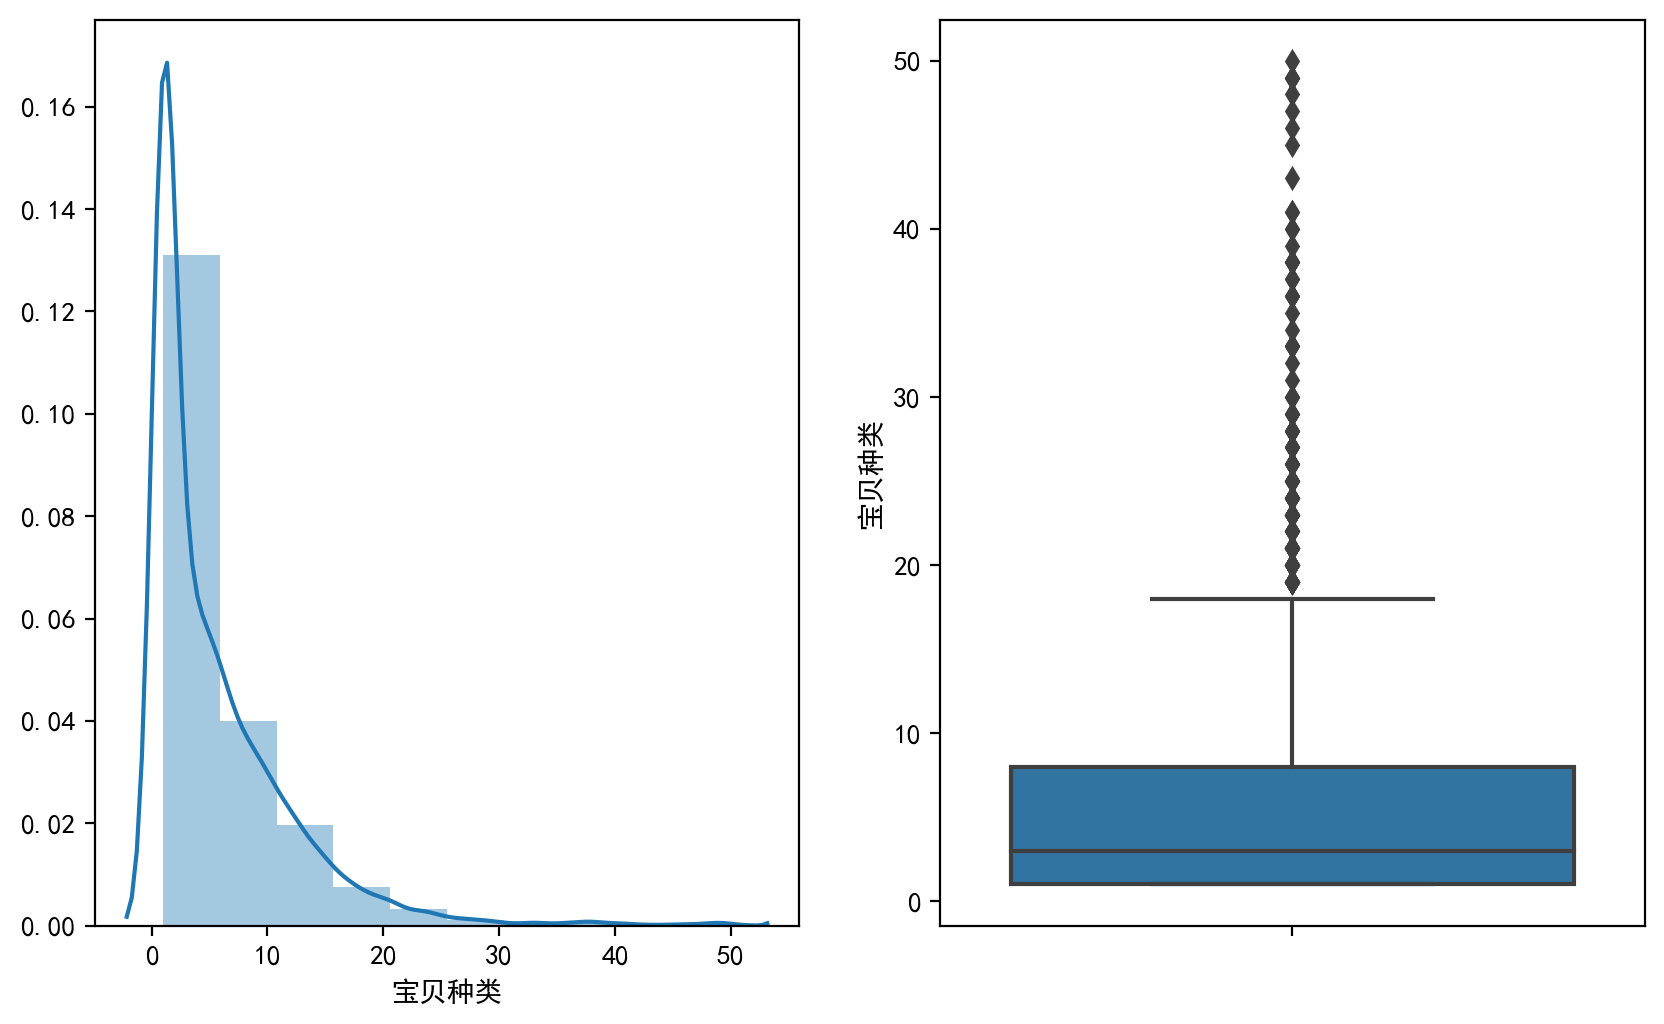

In [49]:
f,(ax1,ax2)=plt.subplots(1,2,figsize=(10,6),dpi=200)
sns.distplot(df_orders.宝贝种类,bins=10,ax=ax1)
sns.boxplot(y='宝贝种类',data=df_orders,ax=ax2)
#宝贝种类的数据还好，偏的不严重

In [118]:
df_orders.宝贝总数量.value_counts()

1      558
10     222
2      220
5      211
3      178
4      159
6      151
20     138
8      123
7      107
15     100
12      91
9       88
13      70
14      68
11      68
30      67
16      55
18      52
25      52
17      48
24      45
23      44
100     44
19      43
22      41
28      40
21      39
50      38
40      35
      ... 
189      1
201      1
215      1
247      1
265      1
97       1
91       1
820      1
220      1
122      1
126      1
136      1
140      1
152      1
156      1
158      1
168      1
188      1
230      1
700      1
240      1
270      1
280      1
300      1
320      1
330      1
279      1
378      1
580      1
362      1
Name: 宝贝总数量, Length: 172, dtype: int64

In [119]:
df_orders.宝贝总数量.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    3986.000000
mean       23.839940
std        44.951522
min         1.000000
25%         4.000000
50%        10.000000
75%        26.000000
90%        54.000000
95%        90.000000
99%       200.000000
max       820.000000
Name: 宝贝总数量, dtype: float64

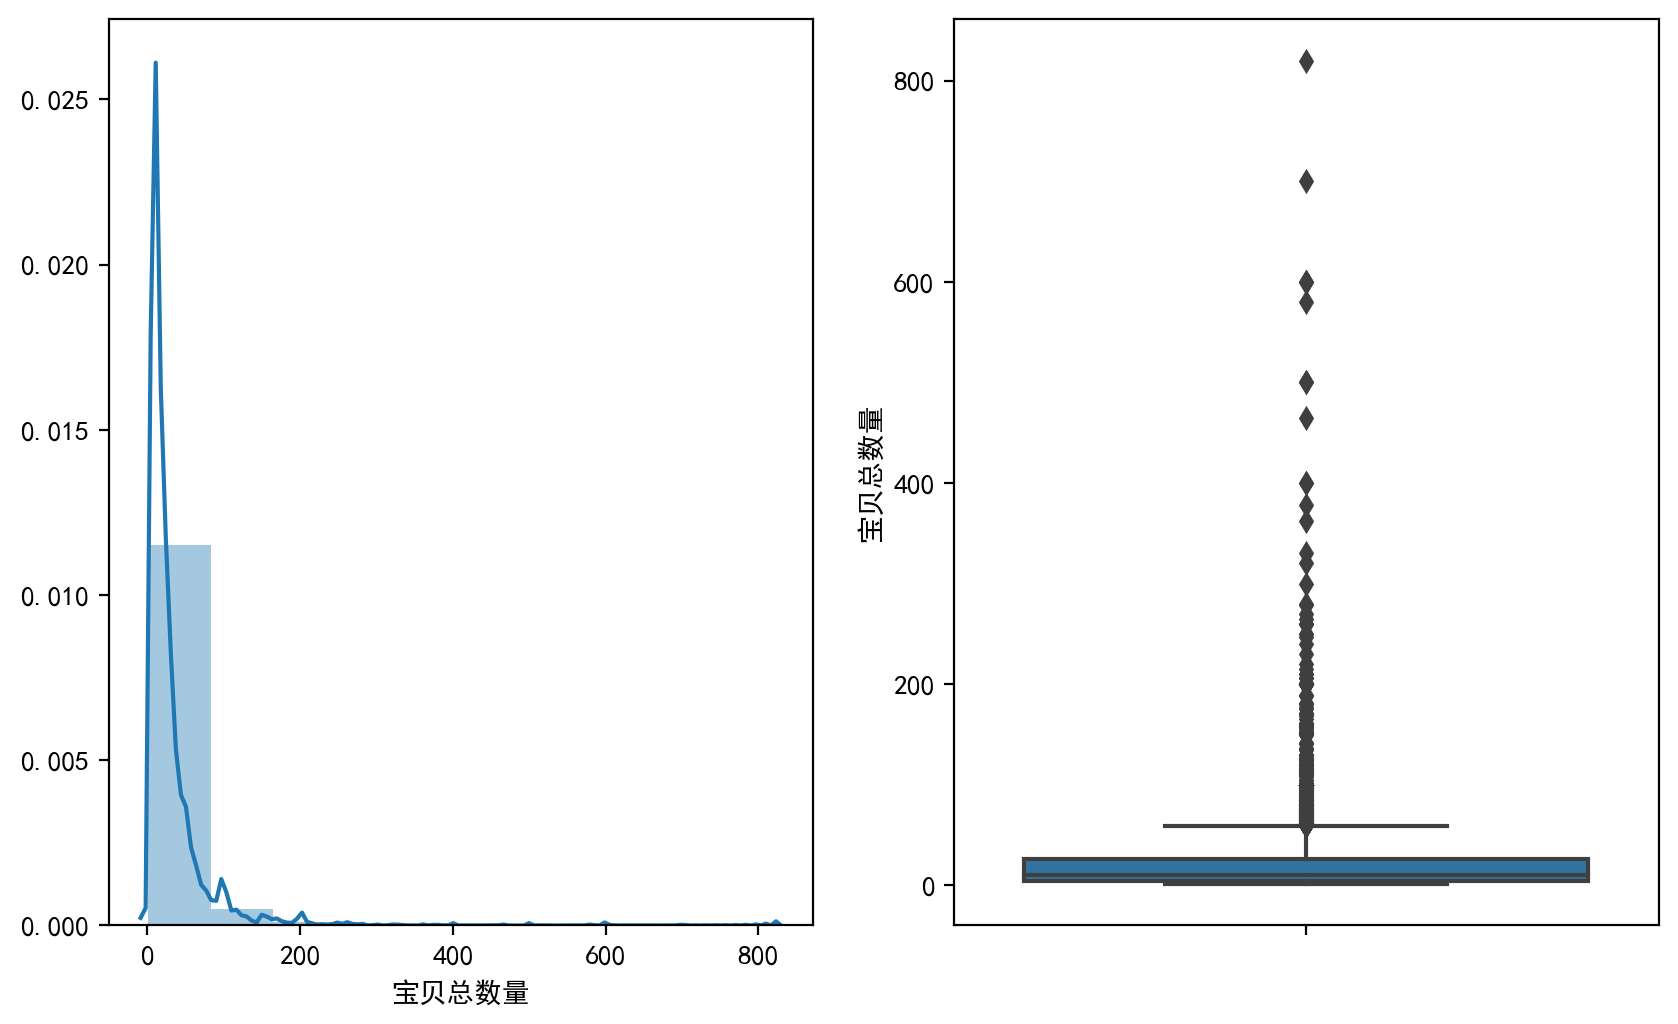

In [50]:
f,(ax1,ax2)=plt.subplots(1,2,figsize=(10,6),dpi=200)
sns.distplot(df_orders.宝贝总数量,bins=10,ax=ax1)
sns.boxplot(y='宝贝总数量',data=df_orders,ax=ax2)
#宝贝种类的数据还好，偏的不严重

In [51]:
#提取宝贝总数量大于500的宝贝
df_orders[df_orders.宝贝总数量>500]

,订单编号,买家会员名,买家实际支付金额,收货地址,宝贝种类,宝贝总数量
929,22549669114817600,184,540.0,安徽省,3,600
1269,21963829567851000,1443,847.6,云南省,10,820
1927,16036882888478300,3342,600.0,湖北省,1,600
2474,18773789323448200,2225,650.0,山西省,14,580
3313,15330230253133200,3106,910.0,广西壮族自治区,1,700
3399,12791063266736000,325,882.0,河北省,2,600


In [52]:
#提取宝贝总数量大于300小于500的宝贝
df_orders[(df_orders.宝贝总数量>300)&(df_orders.宝贝总数量<500)]

,订单编号,买家会员名,买家实际支付金额,收货地址,宝贝种类,宝贝总数量
708,19506742104148000,1561,567.00,浙江省,4,400
853,19162202401111100,1773,628.00,广东省,3,400
927,18958500282478400,1283,310.00,福建省,4,330
1258,18127180864027500,2036,730.00,天津,49,378
2068,15692123063610900,2016,460.00,广东省,5,320
2208,19690730194631500,2894,831.18,广东省,3,362
2346,19181288359997900,521,780.00,江西省,1,465


In [53]:
df_orders[df_orders.宝贝总数量<500]

,订单编号,买家会员名,买家实际支付金额,收货地址,宝贝种类,宝贝总数量
0,21407300627014900,1425,58.51,广东省,5,59
1,24270488269081200,2163,20.70,江西省,2,2
2,21402600386365500,375,12.90,浙江省,1,1
3,21398820349555700,2618,9.81,湖南省,1,1
4,21446781606162100,2012,28.92,安徽省,1,8
5,24273590145516800,2052,48.86,辽宁省,9,9
6,21428563302546600,2018,157.45,福建省,8,27
7,21389820492115500,95,150.34,江苏省,2,26
8,21385360876390000,2470,100.36,广西壮族自治区,1,60
9,24255288928504800,3065,60.34,北京,8,12


In [54]:
#删除宝贝数量大于500的条
df_orders=df_orders[df_orders.宝贝总数量<500]

In [125]:
df_orders.shape

(3978, 6)

In [126]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3978 entries, 0 to 3988
Data columns (total 6 columns):
订单编号        3978 non-null int64
买家会员名       3978 non-null int64
买家实际支付金额    3978 non-null float64
收货地址        3978 non-null object
宝贝种类        3978 non-null int64
宝贝总数量       3978 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 217.5+ KB


#### 合成user_info表

In [55]:
user_info=df_orders.groupby(by=['买家会员名','收货地址']).mean()
user_info

,,订单编号,买家实际支付金额,宝贝种类,宝贝总数量
买家会员名,收货地址,,,,
0,福建省,1.959802e+16,14.90,1.000000,1.000000
1,北京,1.570268e+16,37.56,4.000000,8.000000
2,吉林省,1.314092e+16,58.50,2.000000,15.000000
3,浙江省,2.124262e+16,13.39,2.000000,2.000000
4,江苏省,1.479088e+16,30.87,6.000000,6.000000
5,广东省,1.658336e+16,139.16,1.000000,300.000000
6,山东省,1.428999e+16,8.10,1.000000,2.000000
7,福建省,1.777160e+16,41.04,8.000000,11.000000
8,广东省,1.620827e+16,60.85,3.000000,25.000000


In [56]:
user_info.pop('订单编号')

买家会员名  收货地址   
0      福建省        1.959802e+16
1      北京         1.570268e+16
2      吉林省        1.314092e+16
3      浙江省        2.124262e+16
4      江苏省        1.479088e+16
5      广东省        1.658336e+16
6      山东省        1.428999e+16
7      福建省        1.777160e+16
8      广东省        1.620827e+16
9      江苏省        2.035680e+16
10     江苏省        1.789695e+16
11     湖北省        1.463743e+16
12     福建省        1.986160e+16
13     浙江省        1.890446e+16
14     陕西省        1.586170e+16
15     辽宁省        1.339233e+16
16     北京         1.520845e+16
17     河北省        1.724774e+16
18     江苏省        2.299643e+16
19     山东省        1.919534e+16
20     浙江省        2.201705e+16
21     北京         2.140824e+16
22     四川省        1.701102e+16
23     浙江省        1.920706e+16
24     上海         1.310340e+16
25     重庆         2.358673e+16
26     广东省        1.857027e+16
27     安徽省        1.328057e+16
28     江西省        2.378404e+16
29     江苏省        2.211103e+16
                      ...     
3381   重庆         1.4276

In [57]:
user_info.reset_index(inplace=True)

In [58]:
user_info

,买家会员名,收货地址,买家实际支付金额,宝贝种类,宝贝总数量
0,0,福建省,14.90,1.000000,1.000000
1,1,北京,37.56,4.000000,8.000000
2,2,吉林省,58.50,2.000000,15.000000
3,3,浙江省,13.39,2.000000,2.000000
4,4,江苏省,30.87,6.000000,6.000000
5,5,广东省,139.16,1.000000,300.000000
6,6,山东省,8.10,1.000000,2.000000
7,7,福建省,41.04,8.000000,11.000000
8,8,广东省,60.85,3.000000,25.000000
9,9,江苏省,27.22,7.000000,11.000000


## 基于用户的购买商品的属性特征，挖掘用户特征

### 探索数据

In [59]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21897 entries, 0 to 21896
Data columns (total 10 columns):
订单编号      21897 non-null int64
标题        21897 non-null object
价格        21897 non-null float64
购买数量      21897 non-null int64
外部系统编号    21897 non-null object
商品属性      12636 non-null object
套餐信息      0 non-null float64
备注        130 non-null object
订单状态      21897 non-null object
商家编码      21897 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 1.7+ MB


In [60]:
df_items.标题.value_counts()

2017热卖大号仿真惯性挖土机儿童益智礼品创意义乌地摊货玩具批发     746
创意发光球闪光透明发光水晶弹力球儿童小玩具 夜市地摊货源批发       605
创意新款回力小车惯性坦克 军事儿童玩具模型地摊货源玩具车批发       578
新款热卖闪光手环卡通手腕带小孩儿童玩具义乌厂家地摊货货源批发       462
创意新款发光翅膀背带儿童演出服装天使蝴蝶翅膀地摊货源玩具批发       452
特价发条玩具会跑会跳创意上链发条玩具动物儿童好玩的地摊货批发       445
创意泡泡棒吹泡泡机泡泡枪不漏水宝宝礼物 地摊货源儿童玩具批发       431
特价5号AA普通干电池 电动玩具配件 厂家直销批             357
传统套圈圈玩具创意小鸟水机幼儿园礼品儿童礼物玩具批发地摊热卖       327
正版电动泡泡枪儿童卡通动物吹泡泡机全自动玩具热卖地摊货源批发       327
创意新品电动枪音乐玩具枪发光玩具地摊货源批热卖儿童礼物厂家        313
学步玩具大鸭子儿童手推车 婴儿宝宝手推杆玩具儿童地摊货源批发       312
发条玩具批发上链卡通动物青蛙儿童礼物宝宝玩具经典80后益智地摊      299
创意恐龙玩具卡装仿真恐龙模型小孩礼物宝宝玩具地摊货批发免邮        273
创意电动飞机发光音乐万向车儿童玩具飞机模型拼装 玩具批发地摊       271
2017新款新奇创意音乐发光摇摆鱼电动鱼地摊货源儿童玩具批发热卖     268
创意 发光电动狗有声倒退狗会叫戴眼镜裙子儿童玩具批发地摊热卖       262
热卖儿童创意玩具超人卡装模型生日礼物 义乌玩具批地摊货源         259
创意儿童磁性钓鱼玩具益智宝宝1-2-3岁地摊货源热卖小孩玩具批发     254
儿童拍拍球玩具幼儿园球类宝宝新款充气球小孩无毒西瓜皮球批发        250
创意婴幼儿学习故事机小兔子早教玩具儿童益智地摊货小孩玩具批发       247
创意发光极速弹射陀螺闪光陀螺玩具 义乌小商品夜市地摊货源批发       221
2017新款儿童水枪玩具3岁夏季玩沙戏水环保塑料儿童玩具批发地摊     220
创意宝宝玩具婴儿摇铃中号小喇叭安全材质0-1岁早教儿童玩具批       211
新款蜜蜂车翻斗车特技电动玩具车自

In [61]:
df_items.商品属性.value_counts()
#商品属性，数据过度混杂，无意义，可删除

颜色分类：发光翅膀;大小描述：大号                   354
颜色分类：带绳水晶球5.5CM                     282
颜色分类：黑色电动枪A;大小描述：均码                 221
颜色分类：398-13挖掘机                      219
颜色分类：2385新款挖掘机                      196
颜色分类：发条铁皮青蛙                         175
颜色分类：小兔子故事机;大小描述：均码                 160
套餐类型：标准配置;颜色分类：射击水枪                 149
颜色分类：极速陀螺                           146
颜色分类：磁性钓鱼（6条鱼）;大小描述：均码              144
颜色分类：混合战车套装                         136
颜色分类：孔雀开屏变色手指灯                      134
颜色分类：A380飞机;套餐类型：官方标配               132
颜色分类：蜜蜂翻斗车;套餐类型：官方标配                126
颜色分类：802沙滩车                         126
颜色分类：蘑菇电话机                          118
颜色分类：4个装奥特曼;大小描述：均码                 117
颜色分类：平毛倒退狗;大小描述：颜色随机                111
颜色分类：866铲车挖机                        108
颜色分类：小鸭子手推车                         101
颜色分类：拉线警车                           101
颜色分类：不发光翅膀;大小描述：大号                   98
颜色分类：电子小刀                            95
颜色分类：闪光透明星星蝴蝶                        90
颜色分类：卡通水机;大小描述：选好款式，颜色随机             85


In [62]:
df_items.备注.value_counts()
#备注，快递发邮政，可以不处理

邮政                          18
不要放任何发货清单和与产品有关的宣传页。         8
邮政快递                         2
发邮政                          2
开收据                          2
发邮政。                         2
请检查好质量问题。                    1
不要发天天好邮政                     1
混色发                          1
随机发，不要发同一个哦                  1
请开收据  金色阳光国际幼儿园演出发光翅膀        1
亲开收据   金色阳光国际幼儿园演出道具发光翅膀     1
发个红色的，谢谢！                    1
不要放价格清单                      1
汇通，送小礼物                      1
补发一条电动鱼！发申通                  1
要收据                          1
开张收据  需要报销                   1
发两个颜色                        1
不同颜色的                        1
不同颜色拿几个。谢谢                   1
记得发收据    小车颜色均匀              1
走邮政快递，谢谢！                    1
发中通                          1
收据，广州乐奇积教育咨询有限公司             1
记得写张收据给我，谢谢！！                1
老板：请开张收据                     1
请开发票：杭州至信汽车配件制造有限公司          1
我要发货清单                       1
选一个粉色的                       1
                            ..
申通   绿色                      1
补发赠品    

In [63]:
df_items.套餐信息.value_counts()
#套餐类型业务意义

Series([], Name: 套餐信息, dtype: int64)

In [64]:
df_items.商家编码.value_counts()

HT-5H0094           378
SJQ-DS0071          355
DCFGCB0150          354
168-A30KL0387       273
2385GCC0329         268
SSDDY0124           268
TPQW0138            238
168-A27Q0386        221
398-13GCC0199       219
168-110SJMC         188
224DJ0444           180
8088QTQ0085         164
D63FJ0207           161
866GCC0232          160
GC071004            160
GC018005            156
3633SQ0371          149
1699A-30188         146
866DY0469           144
168-107BXJG0395     143
0389D-0545          143
K02XCQ0087          142
GC054002            140
168-109AJSZD0532    136
383-2GCC0510        136
237GCC0235          135
WY3001SZD0424       134
GC025038            132
A380FJ0131          132
209-1WG0192         131
                   ... 
GC028034              3
GC074008              3
GC067004              3
GC085002              2
GC067003              2
GC017013              2
GC060003              2
GC088004              2
GC027006              2
GC049002              2
GC063011        

In [65]:
df_items=df_items.iloc[:,:3]

In [66]:
df_items.head()

,订单编号,标题,价格
0,21407300627014900,发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家,0.58
1,21407300627014900,特价5号AA普通干电池 电动玩具配件 厂家直销批,1.00
2,21407300627014900,大号泡泡棒沙滩小铲子工具泡泡枪公园吹泡泡户外亲子游戏玩具热卖,1.20
3,21407300627014900,特价正品7号电池儿童电动玩具电源配件 厂家直销1元4节地摊货批发,1.00
4,21407300627014900,儿童沙滩玩具水枪 宝宝玩水玩具户外洗澡游泳漂流戏大号水枪批发,6.79


### 数据库汇总

In [139]:
df_items.shape

(21897, 3)

In [140]:
df_orders.shape

(3978, 6)

In [67]:
orders_items=pd.merge(df_orders,df_items,on='订单编号',how='left')

In [142]:
orders_items.shape

(21847, 8)

In [143]:
orders_items.head()

,订单编号,买家会员名,买家实际支付金额,收货地址,宝贝种类,宝贝总数量,标题,价格
0,21407300627014900,1425,58.51,广东省,5,59,发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家,0.58
1,21407300627014900,1425,58.51,广东省,5,59,特价5号AA普通干电池 电动玩具配件 厂家直销批,1.00
2,21407300627014900,1425,58.51,广东省,5,59,大号泡泡棒沙滩小铲子工具泡泡枪公园吹泡泡户外亲子游戏玩具热卖,1.20
3,21407300627014900,1425,58.51,广东省,5,59,特价正品7号电池儿童电动玩具电源配件 厂家直销1元4节地摊货批发,1.00
4,21407300627014900,1425,58.51,广东省,5,59,儿童沙滩玩具水枪 宝宝玩水玩具户外洗澡游泳漂流戏大号水枪批发,6.79


In [68]:
user_info_items=orders_items.groupby('买家会员名').mean().reset_index()

In [145]:
user_info_items

,买家会员名,订单编号,买家实际支付金额,宝贝种类,宝贝总数量,价格
0,0,1.959802e+16,14.90000,1.000,1.0000,9.900000
1,1,1.570268e+16,37.56000,4.000,8.0000,4.957500
2,2,1.314092e+16,58.50000,2.000,15.0000,3.725000
3,3,2.124262e+16,13.39000,2.000,2.0000,4.520000
4,4,1.479088e+16,30.87000,6.000,6.0000,4.651667
5,5,1.658336e+16,139.16000,1.000,300.0000,0.580000
6,6,1.428999e+16,8.10000,1.000,2.0000,2.590000
7,7,1.777160e+16,41.04000,8.000,11.0000,4.990000
8,8,1.620827e+16,60.85000,3.000,25.0000,2.663333
9,9,2.035680e+16,27.22000,7.000,11.0000,2.334286


In [146]:
user_info.head()

,买家会员名,收货地址,买家实际支付金额,宝贝种类,宝贝总数量
0,0,福建省,14.90,1.0,1.0
1,1,北京,37.56,4.0,8.0
2,2,吉林省,58.50,2.0,15.0
3,3,浙江省,13.39,2.0,2.0
4,4,江苏省,30.87,6.0,6.0


## 处理详情表

### 探索数据

In [147]:
df_atrr.head()
#不同年龄有不同的分段，商品进行分类

,宝贝ID,标题,价格,玩具类型,适用年龄,品牌
0,537396783238,创意新款回力小车惯性坦克 军事儿童玩具模型地摊货源玩具车批发,8.90,塑胶玩具,"3岁,4岁,5岁,6岁",3
1,36286235128,2017热卖大号仿真惯性挖土机儿童益智礼品创意义乌地摊货玩具批发,3.90,其它玩具,"3岁,4岁,5岁,6岁",3
2,35722000205,创意发光球闪光透明发光水晶弹力球儿童小玩具 夜市地摊货源批发,1.65,其它玩具,"3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁,11岁,12岁",3
3,550659732532,新款创意六一儿童节礼物音乐投影电动枪夜市地摊货源批发男孩玩具,9.90,其它玩具,"3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁,11岁,12岁,13岁,14岁",3
4,531877266868,发条玩具批发上链卡通动物青蛙儿童礼物宝宝玩具经典80后益智地摊,1.85,其它玩具,"3岁,4岁",3


In [148]:
df_atrr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 6 columns):
宝贝ID    288 non-null int64
标题      288 non-null object
价格      288 non-null float64
玩具类型    252 non-null object
适用年龄    284 non-null object
品牌      288 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 13.6+ KB


In [149]:
df_atrr.宝贝ID.nunique()

288

In [150]:
df_atrr.标题.nunique()

288

In [151]:
df_atrr.品牌.nunique()

23

In [152]:
df_atrr[df_atrr.适用年龄.isnull()]

,宝贝ID,标题,价格,玩具类型,适用年龄,品牌
10,36266985550,特价5号AA普通干电池 电动玩具配件 厂家直销批,1.00,NaN,NaN,5
74,36267739775,特价正品7号电池儿童电动玩具电源配件 厂家直销1元4节地摊货批发,1.00,NaN,NaN,2
173,36058620932,创意婚庆充气圆形气球义乌小商品热卖地摊货源心形小玩具厂家批发,0.09,NaN,NaN,2
213,552307335477,儿童节创意演出服装表演天使蝴蝶翅膀魔法棒三件套发光小玩具批发,5.90,NaN,NaN,4


In [69]:
df_atrr.适用年龄.fillna(value='missing',inplace=True)

### 适用年龄标签化

In [70]:
#定义一个商品适用年龄的标签结构
#2岁以下不包含2岁，定义为婴儿，包含月
#2岁-4岁定义为幼儿
#5岁-7岁-定义儿童
#8岁以上定义为学生
#用户的消费行为，用户的支付行为，可以关注产品覆盖的年龄段，最重要的字段，搭建部门
def addTag(x):
    tag=''
    if '月' in x:
        tag+='婴儿'
    x=x.split(',')
    #通过将split逗号分割成列表形式
    if '2岁' in x or '3岁' in x or '4岁'in x:
        tag+='幼儿|'
    if '5岁' in x or '6岁' in x or '7岁'in x:
        tag+='儿童|'
    if '8岁' in x or '9岁' in x or '10岁'in x or  '11岁' in x or '12岁' in x or '13岁'in x or '14岁' in x:
        tag+='学生|'
    if 'missing' in x:
        tag+='missing'
    return tag

In [71]:
#这里map和apply的用法一样，通过标签可以获得用户行为特征
df_atrr['tag']=df_atrr.适用年龄.map(addTag)

In [156]:
df_atrr.head()

,宝贝ID,标题,价格,玩具类型,适用年龄,品牌,tag
0,537396783238,创意新款回力小车惯性坦克 军事儿童玩具模型地摊货源玩具车批发,8.90,塑胶玩具,"3岁,4岁,5岁,6岁",3,幼儿|儿童|
1,36286235128,2017热卖大号仿真惯性挖土机儿童益智礼品创意义乌地摊货玩具批发,3.90,其它玩具,"3岁,4岁,5岁,6岁",3,幼儿|儿童|
2,35722000205,创意发光球闪光透明发光水晶弹力球儿童小玩具 夜市地摊货源批发,1.65,其它玩具,"3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁,11岁,12岁",3,幼儿|儿童|学生|
3,550659732532,新款创意六一儿童节礼物音乐投影电动枪夜市地摊货源批发男孩玩具,9.90,其它玩具,"3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁,11岁,12岁,13岁,14岁",3,幼儿|儿童|学生|
4,531877266868,发条玩具批发上链卡通动物青蛙儿童礼物宝宝玩具经典80后益智地摊,1.85,其它玩具,"3岁,4岁",3,幼儿|


In [72]:
df_atrr_0=df_atrr[['标题','tag']]

In [159]:
df_atrr_0.head()

,标题,tag
0,创意新款回力小车惯性坦克 军事儿童玩具模型地摊货源玩具车批发,幼儿|儿童|
1,2017热卖大号仿真惯性挖土机儿童益智礼品创意义乌地摊货玩具批发,幼儿|儿童|
2,创意发光球闪光透明发光水晶弹力球儿童小玩具 夜市地摊货源批发,幼儿|儿童|学生|
3,新款创意六一儿童节礼物音乐投影电动枪夜市地摊货源批发男孩玩具,幼儿|儿童|学生|
4,发条玩具批发上链卡通动物青蛙儿童礼物宝宝玩具经典80后益智地摊,幼儿|


### 与数据表连接

In [73]:
items_atrr=pd.merge(df_items,df_atrr_0,on='标题',how='inner')

In [161]:
items_atrr.head()

,订单编号,标题,价格,tag
0,21407300627014900,发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家,0.58,幼儿|儿童|学生|
1,24043728806509300,发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家,0.58,幼儿|儿童|学生|
2,24043728806509300,发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家,0.68,幼儿|儿童|学生|
3,20885882368182100,发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家,0.68,幼儿|儿童|学生|
4,20885882368182100,发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家,0.58,幼儿|儿童|学生|


In [74]:
items_atrr.pop('标题')

0            发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家
1            发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家
2            发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家
3            发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家
4            发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家
5            发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家
6            发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家
7            发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家
8            发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家
9            发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家
10           发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家
11           发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家
12           发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家
13           发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家
14           发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家
15           发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家
16           发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家
17           发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家
18           发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家
19           发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家
20           发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家
21           发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家
22           发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家
23         

In [163]:
items_atrr.head()

,订单编号,价格,tag
0,21407300627014900,0.58,幼儿|儿童|学生|
1,24043728806509300,0.58,幼儿|儿童|学生|
2,24043728806509300,0.68,幼儿|儿童|学生|
3,20885882368182100,0.68,幼儿|儿童|学生|
4,20885882368182100,0.58,幼儿|儿童|学生|


In [164]:
df_orders.head()

,订单编号,买家会员名,买家实际支付金额,收货地址,宝贝种类,宝贝总数量
0,21407300627014900,1425,58.51,广东省,5,59
1,24270488269081200,2163,20.70,江西省,2,2
2,21402600386365500,375,12.90,浙江省,1,1
3,21398820349555700,2618,9.81,湖南省,1,1
4,21446781606162100,2012,28.92,安徽省,1,8


In [165]:
df_orders.shape

(3978, 6)

In [166]:
items_atrr.shape

(19943, 3)

In [75]:
items_atrr_orders=pd.merge(df_orders,items_atrr,on='订单编号',how='left')

## 构建用户标签表

In [76]:
user_tag=items_atrr_orders[['买家会员名','tag']]

In [77]:
user_tag['购买次数']=0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [170]:
user_tag

,买家会员名,tag,购买次数
0,1425,幼儿|儿童|学生|,0
1,1425,missing,0
2,1425,幼儿|儿童|学生|,0
3,1425,missing,0
4,1425,幼儿|儿童|学生|,0
5,2163,幼儿|儿童|,0
6,2163,幼儿|儿童|,0
7,375,幼儿|儿童|,0
8,2618,幼儿|儿童|学生|,0
9,2012,幼儿|儿童|学生|,0


In [78]:
user_tag=user_tag.groupby(['买家会员名','tag']).count()

In [79]:
user_tag=user_tag.unstack('tag').fillna(0)

### 去除次列

In [80]:
user_tag.columns=user_tag.columns.droplevel()

In [81]:
user_tag

tag,missing,儿童|学生|,婴儿,婴儿幼儿|,婴儿幼儿|儿童|,婴儿幼儿|儿童|学生|,幼儿|,幼儿|儿童|,幼儿|儿童|学生|
买家会员名,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0


### 重置索引

In [82]:
user_tag.reset_index(inplace=True)

In [176]:
user_info

,买家会员名,收货地址,买家实际支付金额,宝贝种类,宝贝总数量
0,0,福建省,14.90,1.000000,1.000000
1,1,北京,37.56,4.000000,8.000000
2,2,吉林省,58.50,2.000000,15.000000
3,3,浙江省,13.39,2.000000,2.000000
4,4,江苏省,30.87,6.000000,6.000000
5,5,广东省,139.16,1.000000,300.000000
6,6,山东省,8.10,1.000000,2.000000
7,7,福建省,41.04,8.000000,11.000000
8,8,广东省,60.85,3.000000,25.000000
9,9,江苏省,27.22,7.000000,11.000000


In [83]:
user_info_price=user_info_items[['买家会员名','价格']]

### 用户表合并

In [84]:
user_items=pd.merge(user_info,user_info_price,on='买家会员名',how='left')

In [85]:
user_items_tag=pd.merge(user_items,user_tag,on='买家会员名',how='left').fillna(0)

## 数据标准化处理

In [86]:
user_items_tag.head()

,买家会员名,收货地址,买家实际支付金额,宝贝种类,宝贝总数量,价格,missing,儿童|学生|,婴儿,婴儿幼儿|,婴儿幼儿|儿童|,婴儿幼儿|儿童|学生|,幼儿|,幼儿|儿童|,幼儿|儿童|学生|
0,0,福建省,14.90,1.0,1.0,9.900000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,北京,37.56,4.0,8.0,4.957500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
2,2,吉林省,58.50,2.0,15.0,3.725000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3,浙江省,13.39,2.0,2.0,4.520000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,4,江苏省,30.87,6.0,6.0,4.651667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0


In [87]:
user_items_tag.isnull().sum()

买家会员名          0
收货地址           0
买家实际支付金额       0
宝贝种类           0
宝贝总数量          0
价格             0
missing        0
儿童|学生|         0
婴儿             0
婴儿幼儿|          0
婴儿幼儿|儿童|       0
婴儿幼儿|儿童|学生|    0
幼儿|            0
幼儿|儿童|         0
幼儿|儿童|学生|      0
dtype: int64

In [88]:
user_items_tag.iloc[:,2:].values

array([[14.9 ,  1.  ,  1.  , ...,  0.  ,  1.  ,  0.  ],
       [37.56,  4.  ,  8.  , ...,  0.  ,  1.  ,  3.  ],
       [58.5 ,  2.  , 15.  , ...,  0.  ,  0.  ,  2.  ],
       ...,
       [38.65,  1.  ,  3.5 , ...,  0.  ,  0.  ,  2.  ],
       [36.  ,  4.  ,  4.  , ...,  0.  ,  4.  ,  0.  ],
       [30.01,  5.  ,  5.  , ...,  0.  ,  1.  ,  2.  ]])

In [89]:
from sklearn.preprocessing import MinMaxScaler
data_pre = user_items_tag.iloc[:,2:].values
mms = MinMaxScaler()
data_norm = mms.fit_transform(data_pre)

In [90]:
data_norm

array([[0.01442401, 0.        , 0.        , ..., 0.        , 0.03333333,
        0.        ],
       [0.03636012, 0.0625    , 0.01508621, ..., 0.        , 0.03333333,
        0.05882353],
       [0.05663117, 0.02083333, 0.03017241, ..., 0.        , 0.        ,
        0.03921569],
       ...,
       [0.0374153 , 0.        , 0.00538793, ..., 0.        , 0.        ,
        0.03921569],
       [0.03484995, 0.0625    , 0.00646552, ..., 0.        , 0.13333333,
        0.        ],
       [0.02905131, 0.08333333, 0.00862069, ..., 0.        , 0.03333333,
        0.03921569]])

## 采用kmeans聚类

### 确定最优的k值

In [91]:
data_norm.shape

(3417, 13)

In [92]:
pd.DataFrame(data_norm).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [93]:
from sklearn.cluster import KMeans

In [94]:
#绘制学习曲线
inertias=[]
for i in range(2,19):
#聚类成3类，fit_predict()可以直接用
    kmeans=KMeans(n_clusters=i,random_state=666)
    y_pred=kmeans.fit_predict(data_norm)
#样本组建距离平方和
    inertias.append(kmeans.inertia_)

Text(0, 0.5, 'inertias')

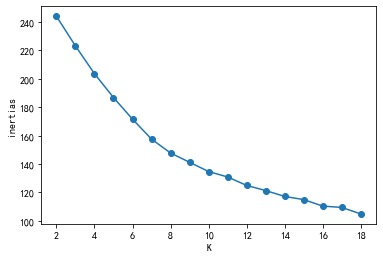

In [95]:
plt.plot(range(2,19),inertias,marker='o')
plt.xlabel('K')
plt.ylabel('inertias')

#### 通过轮廓系数确定

In [96]:
# 导入轮廓系数API
from sklearn.metrics import silhouette_score

In [97]:
#绘制学习曲线
sil=[]
for i in range(2,19):
#聚类，fit_predict()可以直接用
    kmeans=KMeans(n_clusters=i,random_state=666)
    y_pred=kmeans.fit_predict(data_norm)
    #轮廓系数
    s=silhouette_score(data_norm,y_pred)
    sil.append(s)

Text(0, 0.5, 'silhouette_score')

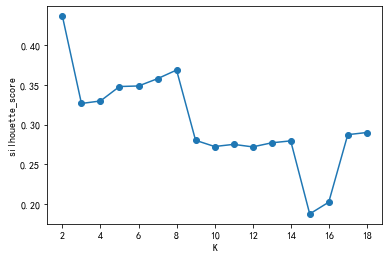

In [98]:
plt.plot(range(2,19),sil,marker='o')
plt.xlabel('K')
plt.ylabel('silhouette_score')

### 聚类分析

In [99]:
kmeans=KMeans(n_clusters=8,random_state=666)
y_pred=kmeans.fit_predict(data_norm)
centers=kmeans.cluster_centers_
labels=kmeans.labels_

In [100]:
pd.Series(labels).unique()

array([1, 6, 7, 5, 3, 4, 0, 2], dtype=int64)

In [219]:
labels.shape

(3417,)

In [220]:
user_items_tag.shape

(3417, 15)

In [101]:
user_items_tag['类别']=labels

In [102]:
user_items_tag.head()

,买家会员名,收货地址,买家实际支付金额,宝贝种类,宝贝总数量,价格,missing,儿童|学生|,婴儿,婴儿幼儿|,婴儿幼儿|儿童|,婴儿幼儿|儿童|学生|,幼儿|,幼儿|儿童|,幼儿|儿童|学生|,类别
0,0,福建省,14.90,1.0,1.0,9.900000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,1,北京,37.56,4.0,8.0,4.957500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1
2,2,吉林省,58.50,2.0,15.0,3.725000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1
3,3,浙江省,13.39,2.0,2.0,4.520000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1
4,4,江苏省,30.87,6.0,6.0,4.651667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1


In [103]:
cluster=user_items_tag[['买家会员名','类别']]

In [226]:
cluster.head()

,买家会员名,类别
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1


In [104]:
cluster.to_csv('cluster.csv',encoding='utf-8',index=False)

## 基于用户聚类的结果进行个性化推荐

### 用户没买过的商品信息列表

#### 构建用户购买表

In [105]:
Total=pd.merge(df_orders,df_items,on='订单编号',how='left')

In [106]:
user_good=Total[['买家会员名','标题']]

In [107]:
user_good['次数']=0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [108]:
user_good_freq=user_good.groupby(['买家会员名','标题']).count().reset_index()

#### 构建矩阵图

In [109]:
user_good_all=user_good_freq.pivot_table(index='买家会员名',columns='标题',values='次数').fillna(0)

In [110]:
user_good_all=user_good_all.stack().reset_index()

In [111]:
user_good_all.rename(columns={0:'购买次数'},inplace=True)

In [248]:
user_good_all.isnull().sum()

买家会员名    0
标题       0
购买次数     0
dtype: int64

#### 构建没买的用户

In [112]:
(user_good_all[user_good_all.购买次数==0]).shape

(1095466, 3)

In [113]:
user_good_notbuy=user_good_all[user_good_all.购买次数==0].drop('购买次数',axis=1)

In [114]:
#没有购买商品的买家用户是3402个
len(set(user_good_notbuy.买家会员名))

3402

### 用户-商品（notbuy）】匹配用户类群【用户-商品（notbuy）-类群

In [115]:
cluster.head()

,买家会员名,类别
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1


In [116]:
user_good_notbuy.shape

(1095466, 2)

In [263]:
cluster.shape

(3417, 2)

In [117]:
user_notbuy_cluster=pd.merge(user_good_notbuy,cluster,on='买家会员名',how='left')

In [266]:
user_notbuy_cluster.类别.unique()

array([1, 6, 7, 5, 3, 4, 0, 2], dtype=int64)

In [118]:
len(set(user_notbuy_cluster.买家会员名))

3402

### 定义喜欢（用户对商品的购买次数表示喜好度），构建用户对商品的喜好度【用户-商品-喜好度】¶

#### 构建res表

In [119]:
user_good_freq.head()

,买家会员名,标题,次数
0,0,创意电动飞机发光音乐万向车儿童玩具飞机模型拼装 玩具批发地摊,1
1,1,儿童玩具批发卡通小飞机泡泡枪不漏水手动泡泡机户外吹泡泡地摊货,1
2,1,创意新款发光翅膀背带儿童演出服装天使蝴蝶翅膀地摊货源玩具批发,1
3,1,创意新款夏季热卖小象手摇风扇夜市地摊小玩具批发六一儿童节礼物,1
4,1,创意热卖回力惯性小汽车特警先锋 12辆巴士儿童玩具地摊货源批发,1


In [120]:
#【用户-商品-喜好度】匹配用户类群【用户-商品-喜好度-类群】
user_good_freq_cluster=pd.merge(user_good_freq,cluster,on='买家会员名',how='left')

In [121]:
user_good_freq_cluster.head()

,买家会员名,标题,次数,类别
0,0,创意电动飞机发光音乐万向车儿童玩具飞机模型拼装 玩具批发地摊,1,1
1,1,儿童玩具批发卡通小飞机泡泡枪不漏水手动泡泡机户外吹泡泡地摊货,1,1
2,1,创意新款发光翅膀背带儿童演出服装天使蝴蝶翅膀地摊货源玩具批发,1,1
3,1,创意新款夏季热卖小象手摇风扇夜市地摊小玩具批发六一儿童节礼物,1,1
4,1,创意热卖回力惯性小汽车特警先锋 12辆巴士儿童玩具地摊货源批发,1,1


In [122]:
#5、同一类群中的用户对同一种商品的喜好度进行聚合，得到，用户类群对每一个商品的喜好度【类群-商品-平均喜好度】
cluster_item_freq=user_good_freq_cluster.groupby(['类别','标题']).mean().reset_index()

In [123]:
cluster_item_freq.head()

,类别,标题,买家会员名,次数
0,0,10元以下儿童小玩具批发创意棒棒糖发光棒女孩闪光棒夜市地摊货源,2071.80,1.2
1,0,2017创意发光玩具七彩闪光飞轮拉哨旋转男孩儿童玩具地摊货源批发,2194.00,1.0
2,0,2017创意台球桌小玩具儿童礼物男孩义乌玩具批发地摊货源免邮好玩,1327.25,1.0
3,0,2017创意惯性工程车推土机男孩儿童玩具车批发新奇礼物地摊热卖,589.00,1.0
4,0,2017创意新款惯性工程车 槽罐水泥车汽车男生礼物儿童玩具车批发,1189.50,1.0


In [124]:
cluster_item_freq.pop('买家会员名')

0       2071.800000
1       2194.000000
2       1327.250000
3        589.000000
4       1189.500000
5       2300.000000
6        443.000000
7       1312.000000
8       2416.333333
9       1682.000000
10      2156.818182
11      2134.571429
12       893.000000
13      2295.333333
14      1495.375000
15      1156.000000
16      2345.000000
17      1578.500000
18      1575.777778
19       153.000000
20      1018.000000
21      1218.625000
22      2144.000000
23      2433.000000
24      1672.000000
25      2084.666667
26      1820.875000
27      1354.000000
28      2278.000000
29      2496.250000
           ...     
1830    1353.250000
1831     427.000000
1832    1868.000000
1833    1789.333333
1834    1161.307692
1835    1777.000000
1836    1755.000000
1837    1252.500000
1838    1534.666667
1839     126.000000
1840    1736.000000
1841     533.000000
1842    1608.434783
1843     385.000000
1844    1801.444444
1845    1050.500000
1846     533.500000
1847    1497.000000
1848       7.000000


In [125]:
cluster_item_freq.head()

,类别,标题,次数
0,0,10元以下儿童小玩具批发创意棒棒糖发光棒女孩闪光棒夜市地摊货源,1.2
1,0,2017创意发光玩具七彩闪光飞轮拉哨旋转男孩儿童玩具地摊货源批发,1.0
2,0,2017创意台球桌小玩具儿童礼物男孩义乌玩具批发地摊货源免邮好玩,1.0
3,0,2017创意惯性工程车推土机男孩儿童玩具车批发新奇礼物地摊热卖,1.0
4,0,2017创意新款惯性工程车 槽罐水泥车汽车男生礼物儿童玩具车批发,1.0


In [126]:
user_notbuy_cluster.head(3)

,买家会员名,标题,类别
0,0,0-1岁婴幼儿摇铃3-6个月宝宝拼接动物手摇铃牙胶男女孩玩具袋装,1
1,0,10元以下儿童小玩具批发创意棒棒糖发光棒女孩闪光棒夜市地摊货源,1
2,0,2017创意发光玩具七彩闪光飞轮拉哨旋转男孩儿童玩具地摊货源批发,1


In [290]:
user_notbuy_cluster.shape

(1100297, 3)

In [291]:
cluster_item_freq.shape

(1860, 3)

In [127]:
#标题和类别都作为连接方式是怎样的的
res=pd.merge(user_notbuy_cluster,cluster_item_freq,on=['标题','类别'],how='left').fillna(0)

In [303]:
res.head()

,买家会员名,标题,类别,次数
0,0,0-1岁婴幼儿摇铃3-6个月宝宝拼接动物手摇铃牙胶男女孩玩具袋装,1,1.0
1,0,10元以下儿童小玩具批发创意棒棒糖发光棒女孩闪光棒夜市地摊货源,1,1.0
2,0,2017创意发光玩具七彩闪光飞轮拉哨旋转男孩儿童玩具地摊货源批发,1,1.0
3,0,2017创意台球桌小玩具儿童礼物男孩义乌玩具批发地摊货源免邮好玩,1,1.0
4,0,2017创意惯性工程车推土机男孩儿童玩具车批发新奇礼物地摊热卖,1,1.0


#### 个性化推荐

In [128]:
#7、对用户进行分组排序，推荐
group=res.groupby('买家会员名')

In [129]:
#构建推荐函数
def get_topk(group,k):
    rec=group.sort_values('次数',ascending=False)[:k]
    return rec

In [130]:
topk=group.apply(get_topk,k=5)

In [131]:
topk

买家会员名                                标题  类别        次数
买家会员名                                                               
0     303          0     特价发条玩具会跑会跳创意上链发条玩具动物儿童好玩的地摊货批   1  4.250000
      79           0     六一新品恐龙玩具模型回力小车迷你玩具车儿童节礼物地摊货源批   1  4.000000
      322          0    过家家厨房玩具仿真小家电电动热卖单只装迷你儿童玩具女孩童创意   1  3.111111
      80           0    六一新品恐龙玩具模型回力小车迷你玩具车儿童节礼物地摊货源批发   1  2.814815
      318          0    经典发条玩具会跑会跳创意上链发条玩具动物儿童好玩的地摊货批发   1  2.666667
1     626          1     特价发条玩具会跑会跳创意上链发条玩具动物儿童好玩的地摊货批   1  4.250000
      404          1     六一新品恐龙玩具模型回力小车迷你玩具车儿童节礼物地摊货源批   1  4.000000
      645          1    过家家厨房玩具仿真小家电电动热卖单只装迷你儿童玩具女孩童创意   1  3.111111
      405          1    六一新品恐龙玩具模型回力小车迷你玩具车儿童节礼物地摊货源批发   1  2.814815
      641          1    经典发条玩具会跑会跳创意上链发条玩具动物儿童好玩的地摊货批发   1  2.666667
2     951          2     特价发条玩具会跑会跳创意上链发条玩具动物儿童好玩的地摊货批   1  4.250000
      728          2     六一新品恐龙玩具模型回力小车迷你玩具车儿童节礼物地摊货源批   1  4.000000
      970          2    过家家厨房玩具仿真小家电电动热卖单只装迷你儿童玩具女孩童创意   1  3.111111
      729          2    六一新品恐龙玩具模型回力小车迷你玩具车儿童节礼物地摊货源批发   1  2.814815
      966          2    经典发条玩具会跑会跳创意上链发条玩具动物儿童好玩的地摊货批发   1  2.666667
3     1276         3     特价发条玩具会跑会跳创意上链发条玩具动物儿童好玩的地摊货批   1  4.250000
      1053         3     六一新品恐龙玩具模型回力小车迷你玩具车儿童节礼物地摊货源批   1  4.000000
      1295         3    过家家厨房玩具仿真小家电电动热卖单只装迷你儿童玩具女孩童创意   1  3.111111
      1054         3    六一新品恐龙玩具模型回力小车迷你玩具车儿童节礼物地摊货源批发   1  2.814815
      1291         3    经典发条玩具会跑会跳创意上链发条玩具动物儿童好玩的地摊货批发   1  2.666667
4     1597         4     特价发条玩具会跑会跳创意上链发条玩具动物儿童好玩的地摊货批   1  4.250000
      1378         4     六一新品恐龙玩具模型回力小车迷你玩具车儿童节礼物地摊货源批   1  4.000000
      1616         4    过家家厨房玩具仿真小家电电动热卖单只装迷你儿童玩具女孩童创意   1  3.111111
      1379         4    六一新品恐龙玩具模型回力小车迷你玩具车儿童节礼物地摊货源批发   1  2.814815
      1612         4    经典发条玩具会跑会跳创意上链发条玩具动物儿童好玩的地摊货批发   1  2.666667
5     1786         5    创意新款回力小车惯性坦克 军事儿童玩具模型地摊货源玩具车批发   6  7.000000
      1783         5    创意新款儿童闪光水晶球小孩弹力球热卖夜市地摊货源玩具批发免邮   6  5.000000
      1924         5    特价发条玩具会跑会跳创意上链发条玩具动物儿童好玩的地摊货批发   6  4.500000
      1791         5    创意泡泡棒吹泡泡机泡泡枪不漏水宝宝礼物 地摊货源儿童玩具批发   6  4.333333
      1658         5     儿童拍拍球玩具幼儿园球类宝宝新款充气球小孩无毒西瓜皮球批发   6  3.666667
...              ...                               ...  ..       ...
3405  1098518   3405    创意新款回力小车惯性坦克 军事儿童玩具模型地摊货源玩具车批发   6  7.000000
      1098515   3405    创意新款儿童闪光水晶球小孩弹力球热卖夜市地摊货源玩具批发免邮   6  5.000000
      1098657   3405    特价发条玩具会跑会跳创意上链发条玩具动物儿童好玩的地摊货批发   6  4.500000
      1098523   3405    创意泡泡棒吹泡泡机泡泡枪不漏水宝宝礼物 地摊货源儿童玩具批发   6  4.333333
      1098391   3405     儿童拍拍球玩具幼儿园球类宝宝新款充气球小孩无毒西瓜皮球批发   6  3.666667
3406  1098947   3406    新款热卖闪光手环卡通手腕带小孩儿童玩具义乌厂家地摊货货源批发   4  3.566038
      1098841   3406    创意新款回力小车惯性坦克 军事儿童玩具模型地摊货源玩具车批发   4  3.104651
      1098702   3406     传统套圈圈玩具创意小鸟水机幼儿园礼品儿童礼物玩具批地摊热卖   4  2.500000
      1098818   3406   创意宝宝玩具婴儿摇铃中号小喇叭安全材质0-1岁早教儿童玩具批发   4  2.473684
      1098694   3406  2017热卖大号仿真惯性挖土机儿童益智礼品创意义乌地摊货玩具批发   4  2.465517
3407  1099302   3407     特价发条玩具会跑会跳创意上链发条玩具动物儿童好玩的地摊货批   1  4.250000
      1099078   3407     六一新品恐龙玩具模型回力小车迷你玩具车儿童节礼物地摊货源批   1  4.000000
      1099321   3407    过家家厨房玩具仿真小家电电动热卖单只装迷你儿童玩具女孩童创意   1  3.111111
      1099079   3407    六一新品恐龙玩具模型回力小车迷你玩具车儿童节礼物地摊货源批发   1  2.814815
      1099317   3407    经典发条玩具会跑会跳创意上链发条玩具动物儿童好玩的地摊货批发   1  2.666667
3408  1099627   3408     特价发条玩具会跑会跳创意上链发条玩具动物儿童好玩的地摊货批   1  4.250000
      1099403   3408     六一新品恐龙玩具模型回力小车迷你玩具车儿童节礼物地摊货源批   1  4.000000
      1099646   3408    过家家厨房玩具仿真小家电电动热卖单只装迷你儿童玩具女孩童创意   1  3.111111
      1099404   3408    六一新品恐龙玩具模型回力小车迷你玩具车儿童节礼物地摊货源批发   1  2.814815
      1099642   3408    经典发条玩具会跑会跳创意上链发条玩具动物儿童好玩的地摊货批发   1  2.666667
3409  1099952   3409     特价发条玩具会跑会跳创意上链发条玩具动物儿童好玩的地摊货批   1  4.250000
      1099729   3409     六一新品恐龙玩具模型回力小车迷你玩具车儿童节礼物地摊货源批   1  4.000000
      1099971   3409    过家家厨房玩具仿真小家电电动热卖单只装迷你儿童玩具女孩童创意   1  3.111111
      1099730   3409    六一新品恐龙玩具模型回力小车迷你玩具车儿童节礼物地摊货源批发   1  2.814815
      1099967   3409    经典发条玩具会跑会跳创意上链发条玩具动物儿童好玩的地摊货批发   1  2.666667
3410  1100274

In [132]:
topk.index=topk.index.droplevel(1)

In [133]:
topk.reset_index(inplace=True)

ValueError: cannot insert 买家会员名, already exists

In [134]:
topk.head()

,买家会员名,标题,类别,次数
买家会员名,,,,
0,0,特价发条玩具会跑会跳创意上链发条玩具动物儿童好玩的地摊货批,1,4.250000
0,0,六一新品恐龙玩具模型回力小车迷你玩具车儿童节礼物地摊货源批,1,4.000000
0,0,过家家厨房玩具仿真小家电电动热卖单只装迷你儿童玩具女孩童创意,1,3.111111
0,0,六一新品恐龙玩具模型回力小车迷你玩具车儿童节礼物地摊货源批发,1,2.814815
0,0,经典发条玩具会跑会跳创意上链发条玩具动物儿童好玩的地摊货批发,1,2.666667
